Data Visualization in R
by Md Juber Rahman

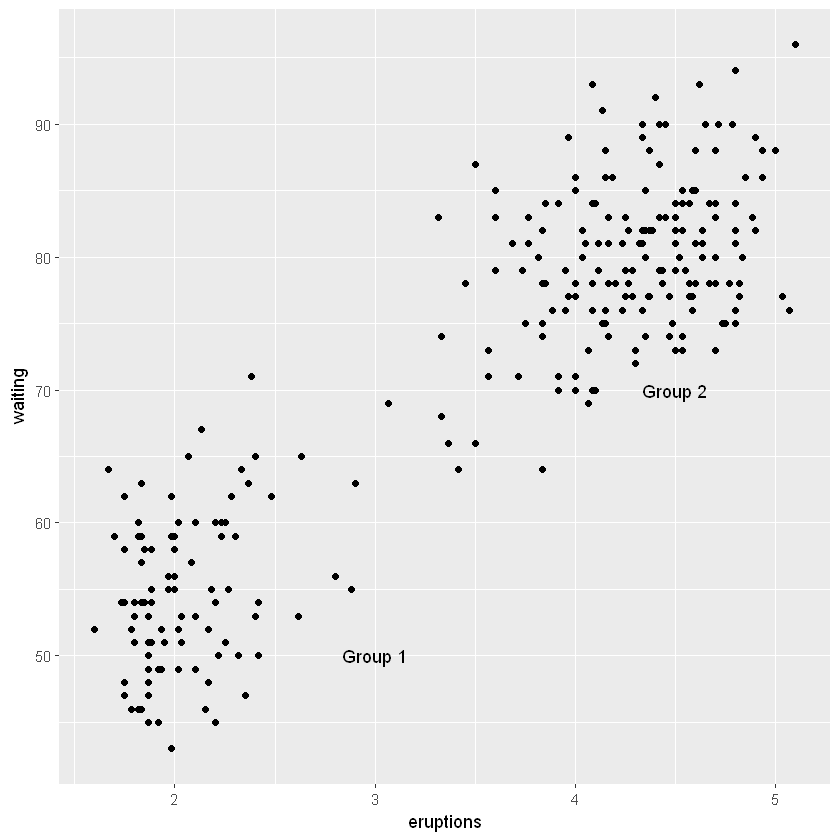

In [4]:
#Annotate a scatter plot
library(ggplot2)
p<-ggplot(faithful,aes(x=eruptions,y=waiting))+geom_point()
p+annotate("text",x=3,y=50,label="Group 1")+annotate("text",x=4.5,y=70,label="Group 2")

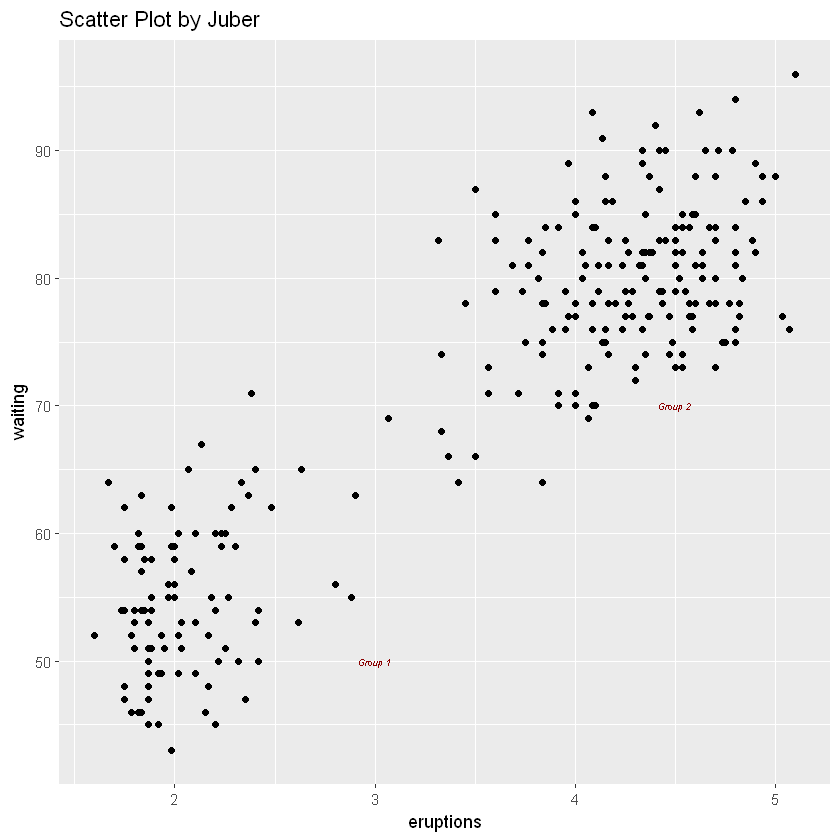

In [6]:
# Change annotation text color, font, size
p+annotate("text",x=3,y=50,label="Group 1",fontface="italic",color="darkred",size=2)+annotate("text",x=4.5,y=70,label="Group 2",fontface="italic",color="darkred",size=2)+ggtitle("Scatter Plot by Juber")

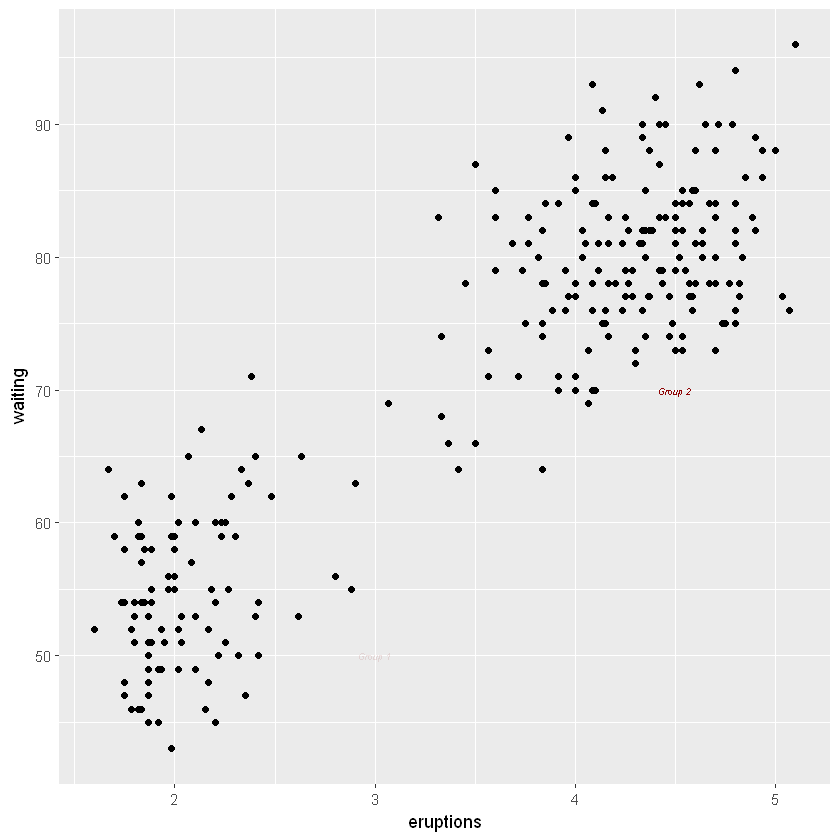

In [8]:
#difference between geom_text() and annotation
p+annotate("text",x=3,y=50,label="Group 1",fontface="italic",color="darkred",size=2,alpha=.1)+geom_text(x=4.5,y=70,label="Group 2",fontface="italic",color="darkred",size=2,alpha=.1)

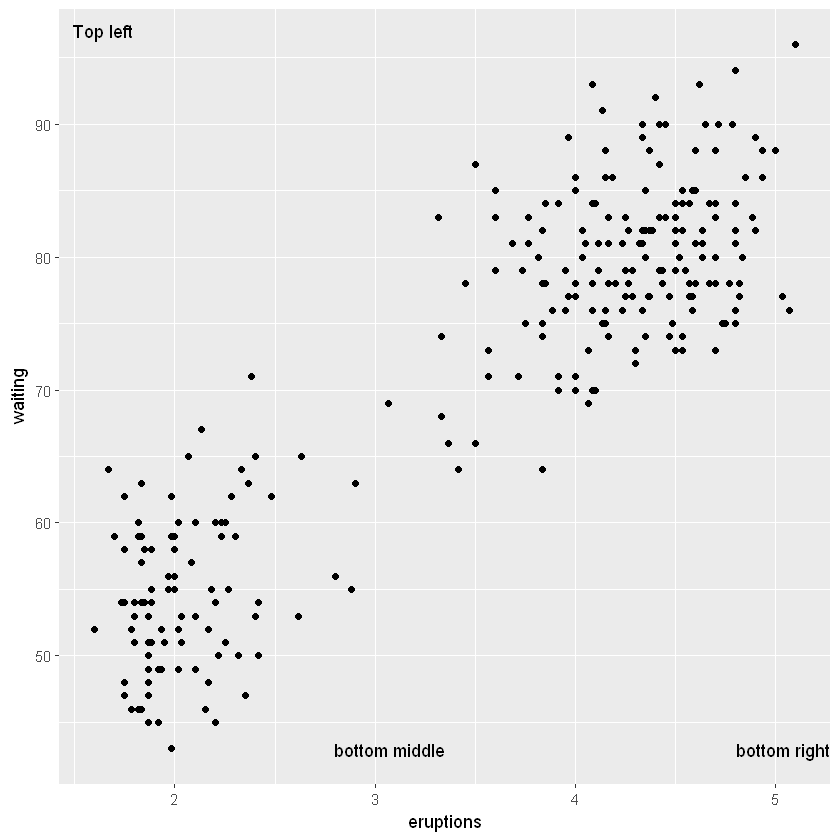

In [18]:
#placing annotation at the top/bottom left/right corner and at the middle bottom
p+annotate("text",x=-Inf,y=Inf,label="Top left",vjust=2,hjust=-.2)+annotate("text",x=Inf,y=-Inf,label="bottom right",vjust=-2,hjust=1)+annotate("text",x=mean(range(faithful$eruptions)),y=-Inf,label="bottom middle",vjust=-2,hjust=1)

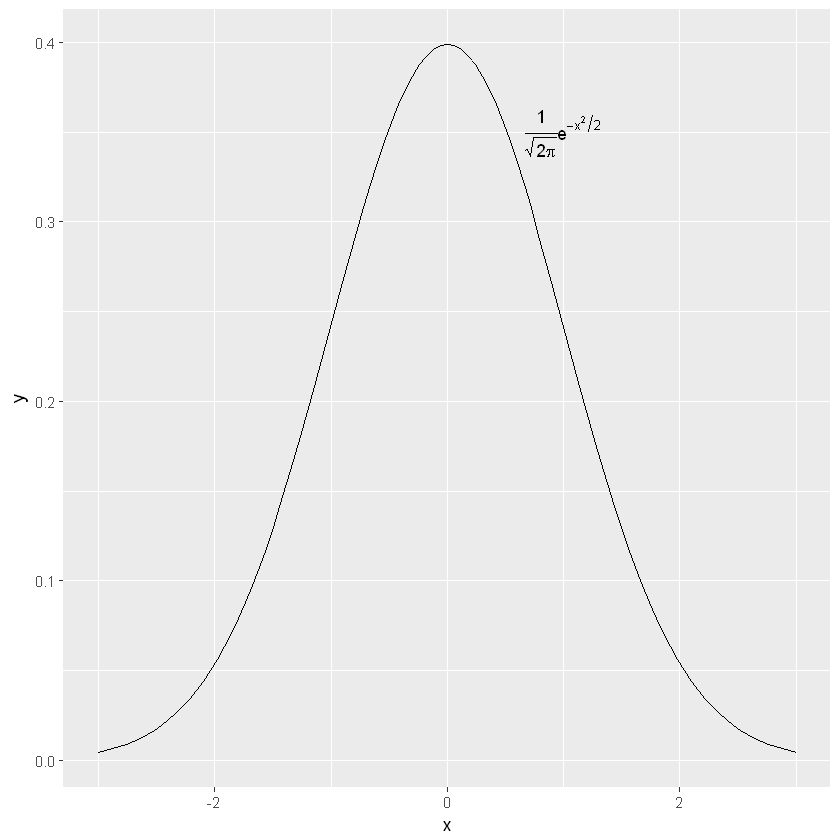

In [29]:
# Use mathematical expression in annotations
p<-ggplot(data.frame(x=c(-3,3)),aes(x=x))+stat_function(fun=dnorm)
p+annotate("text",x=1,y=.35,parse=TRUE,label="frac(1,sqrt(2*pi))*e^{-x^2/2}")

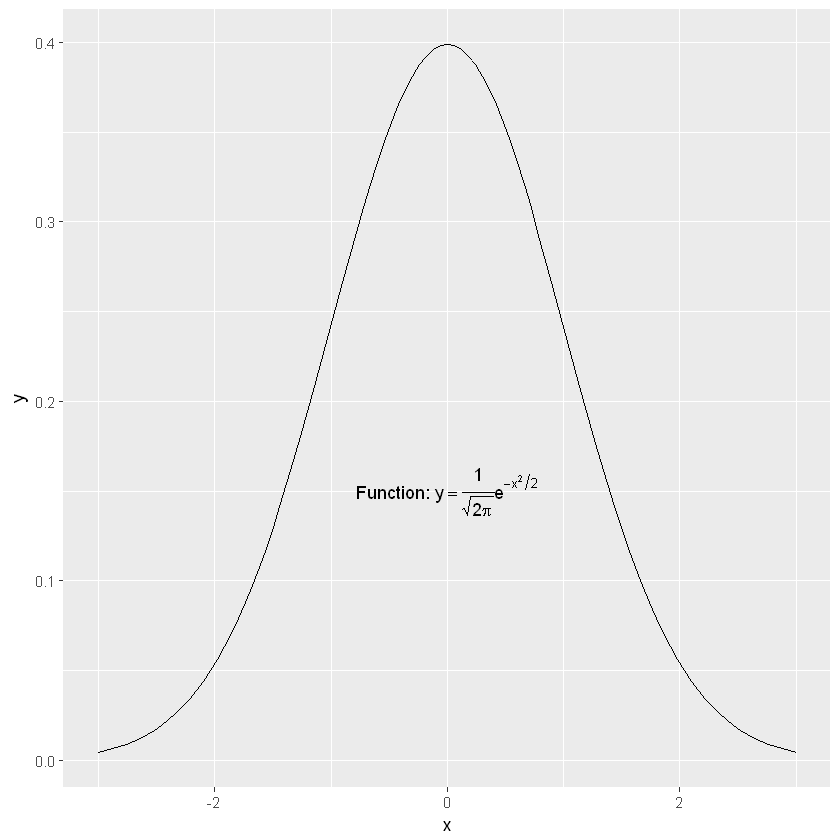

In [33]:
# add text with mathematical expression
p+annotate("text",x=0,y=.15,parse=TRUE,label="'Function: '* y==frac(1,sqrt(2*pi))*e^{-x^2/2}")

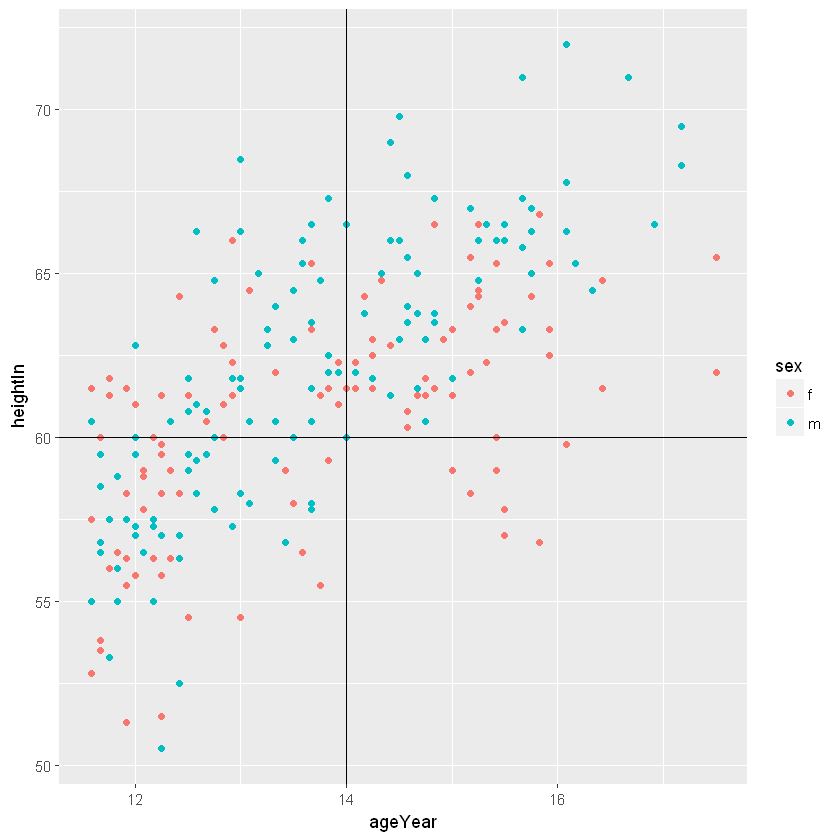

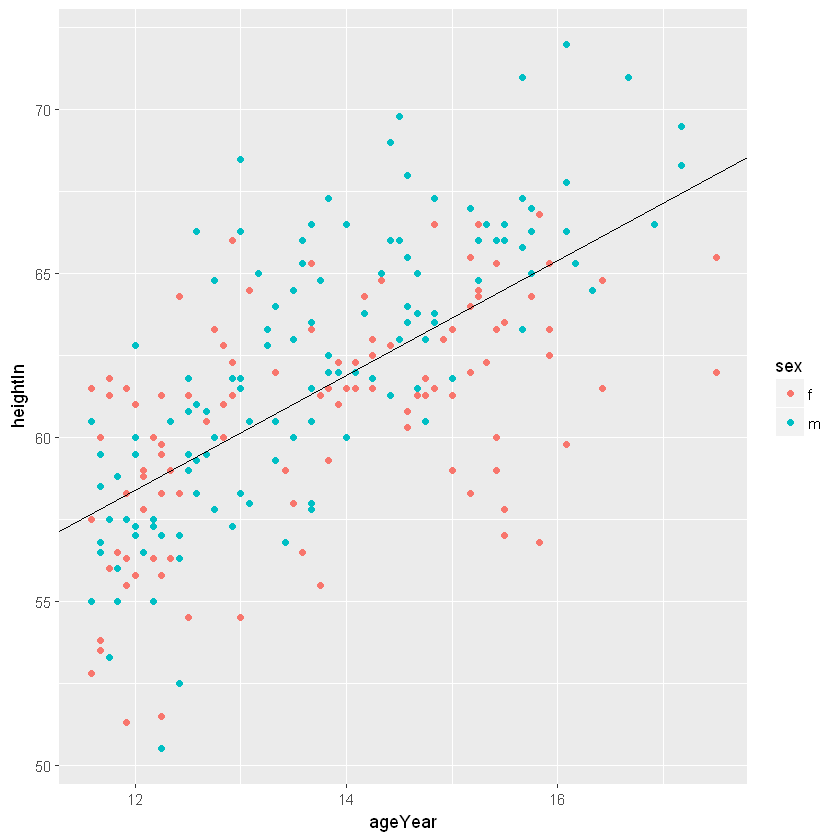

In [42]:
# Adding lines with scatter plot
library(gcookbook)
p<-ggplot(heightweight,aes(x=ageYear,y=heightIn,colour=sex))+geom_point()
p+geom_hline(yintercept=60)+geom_vline(xintercept=14)
# add a line with slope
p+geom_abline(intercept=37.4,slope=1.75)

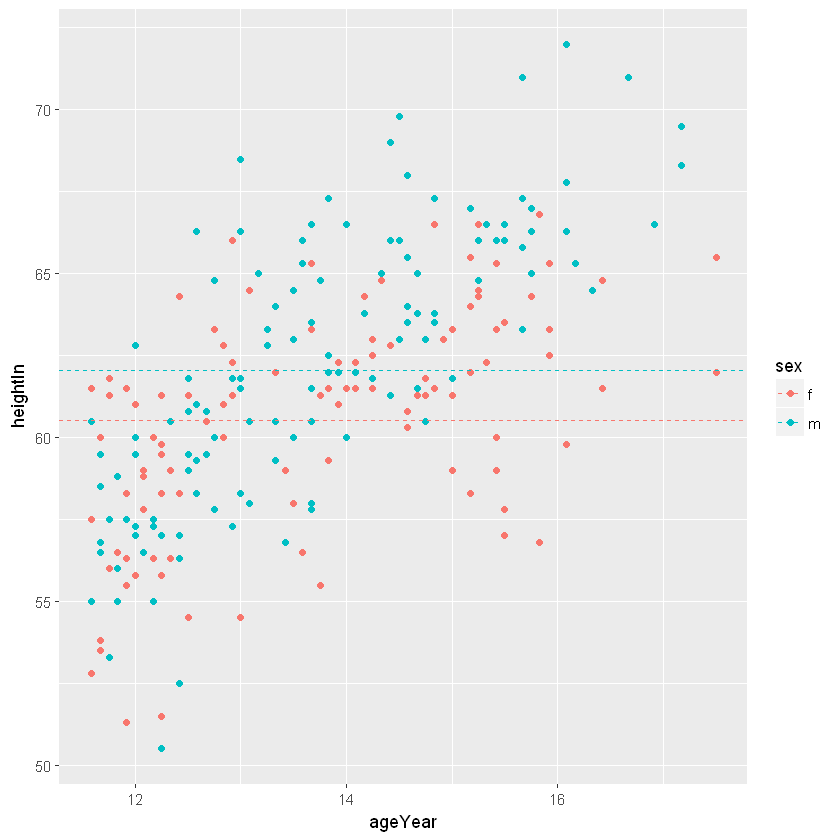

In [49]:
# Lines drawn at the mean of each group
library(plyr)
hw_means<-ddply(heightweight,"sex",summarise,heightIn=mean(heightIn))
p+geom_hline(aes(yintercept=heightIn,colour=sex),data=hw_means,linetype="dashed")

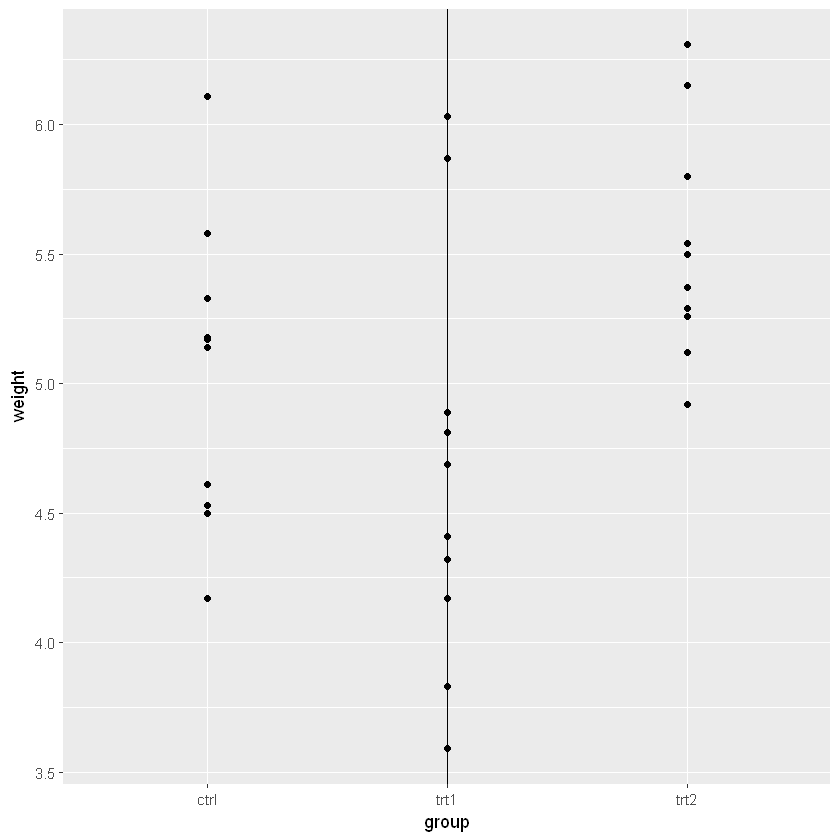

In [52]:
# Draw vertical line for a specific group
p<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_point()
p+geom_vline(xintercept=which(levels(PlantGrowth$group)=="trt1"))

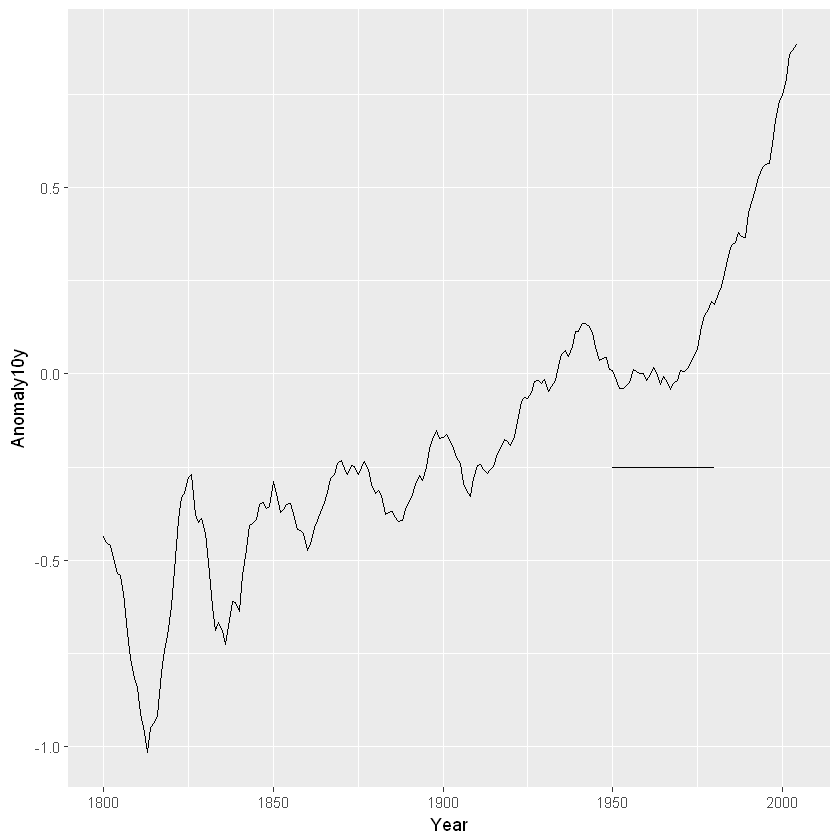

In [59]:
# Adding line , segments and arrows
library(gcookbook)
p<-ggplot(subset(climate,Source=="Berkeley"),aes(x=Year,y=Anomaly10y))+geom_line()
p+annotate("segment",x=1950,xend=1980,y=-.25,yend=-.25)


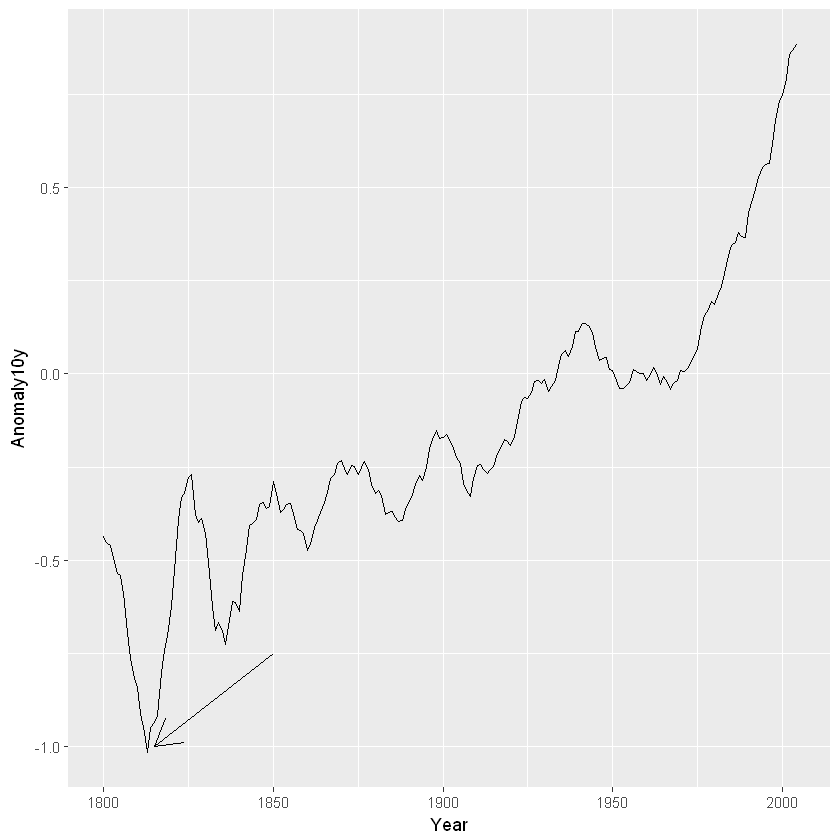

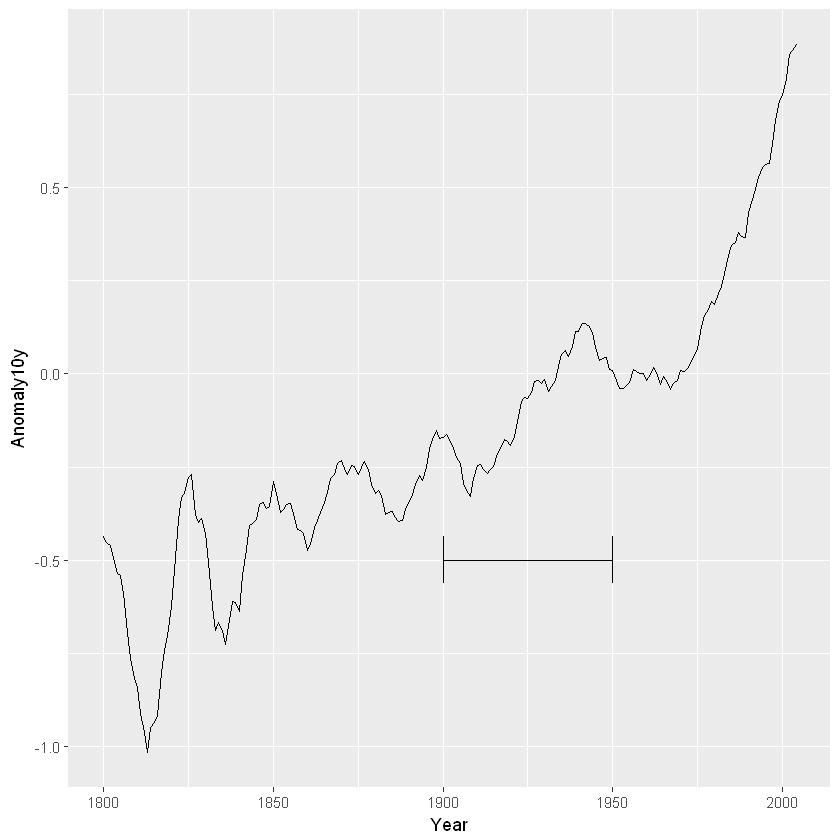

In [65]:
#Add arrows
p+annotate("segment",x=1850,xend=1815,y=-.75,yend=-1,arrow=arrow())
p+annotate("segment",x=1900,xend=1950,y=-.5,yend=-.5,arrow=arrow(ends="both",angle=90,length=unit(.5,"cm")))

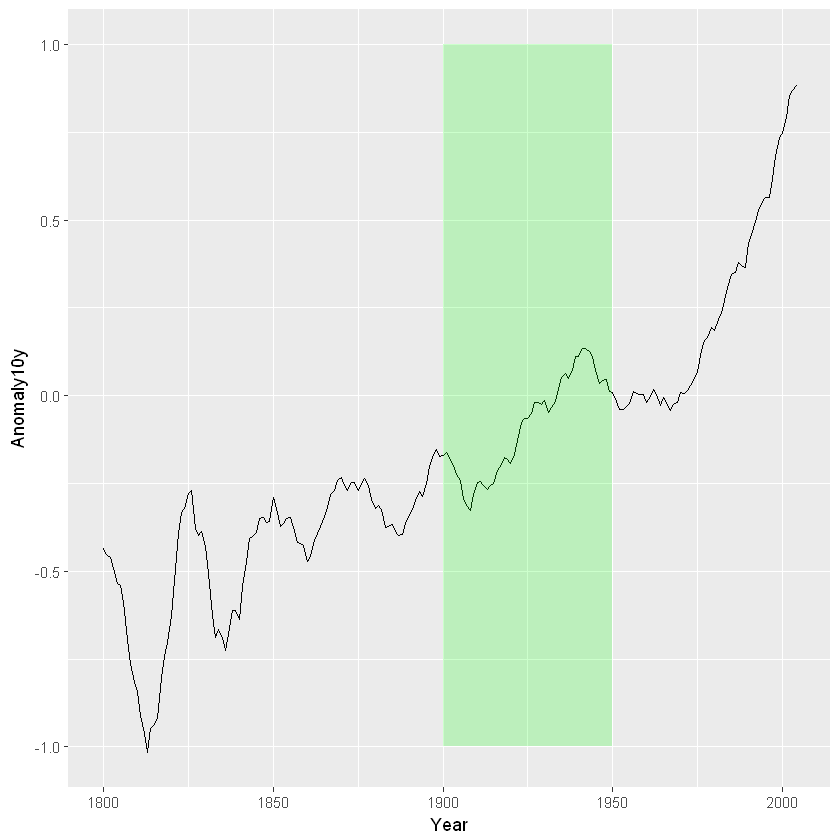

In [68]:
#Add shaded rectangle
p+annotate("rect",xmin=1900,xmax=1950,ymin=-1,ymax=1,alpha=.2,fill="green")

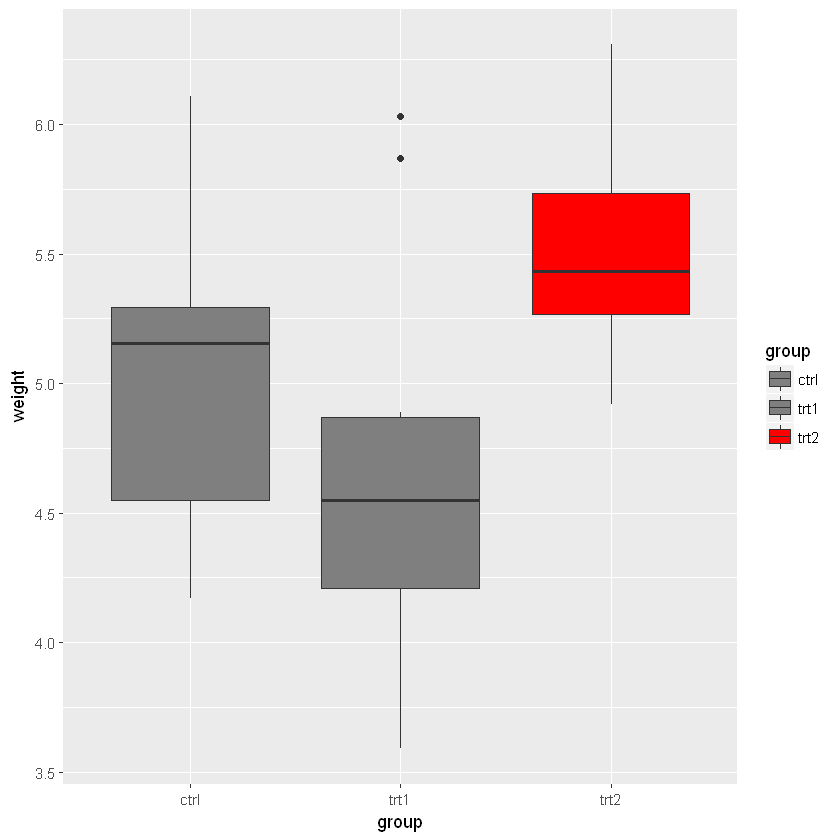

In [70]:
#Highlight an item
p<-ggplot(PlantGrowth,aes(x=group,y=weight,fill=group))+geom_boxplot()
p+scale_fill_manual(values=c("grey50","grey50","red"))

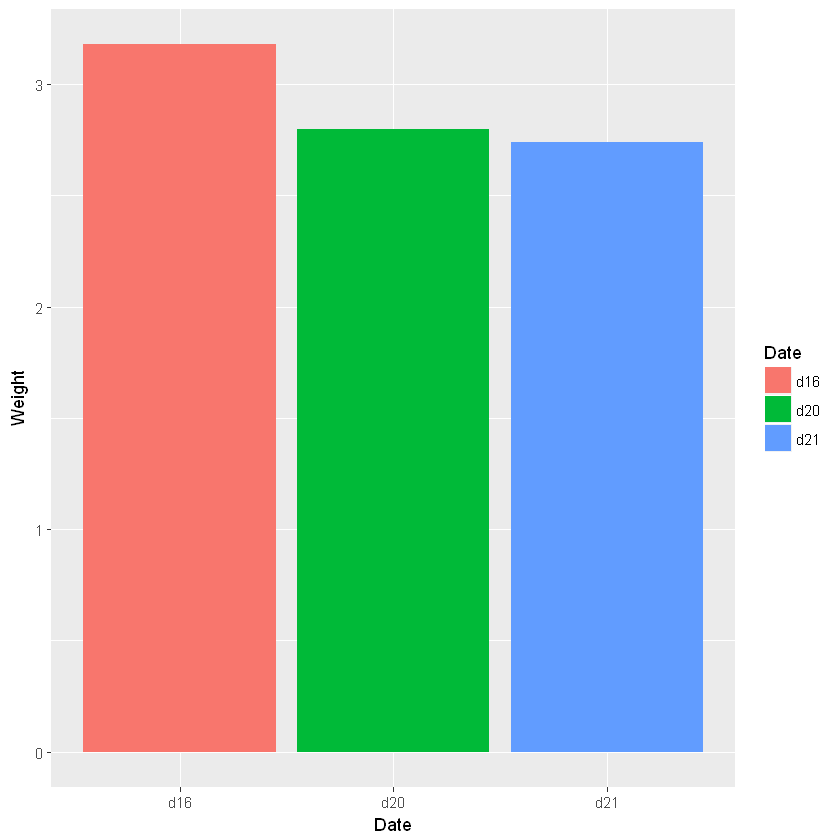

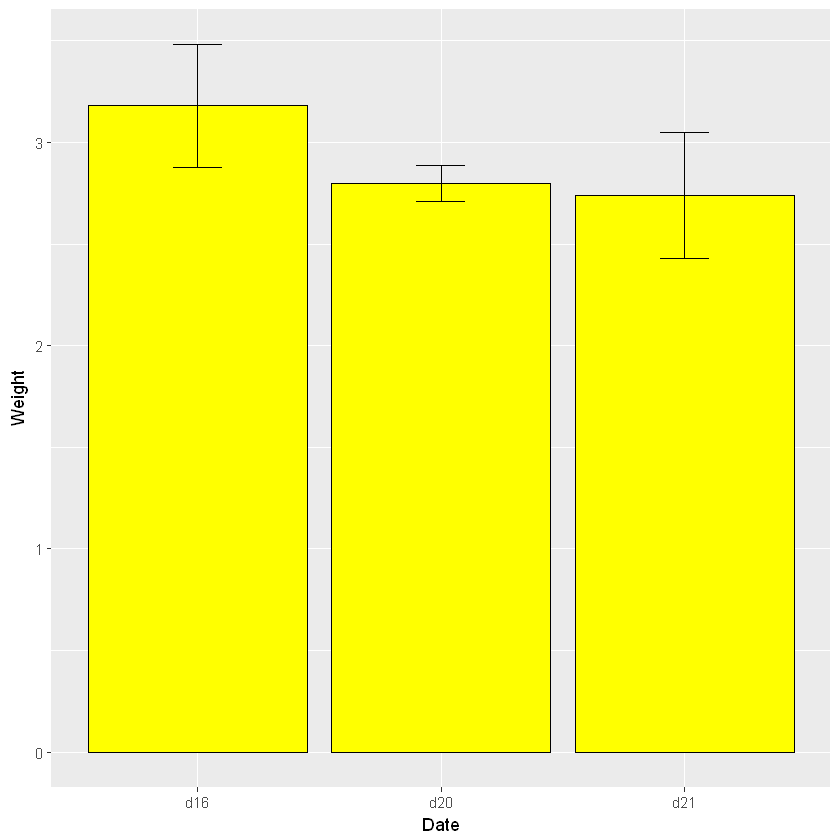

In [83]:
# Adding error bar
ce<-subset(cabbage_exp,Cultivar=="c39")
p<-ggplot(ce,aes(Date,Weight,fill=Date))
p+geom_bar(stat="identity")
p+geom_bar(stat="identity",fill="yellow",colour="black")+geom_errorbar(aes(ymin=Weight-se,ymax=Weight+se),width=.2)

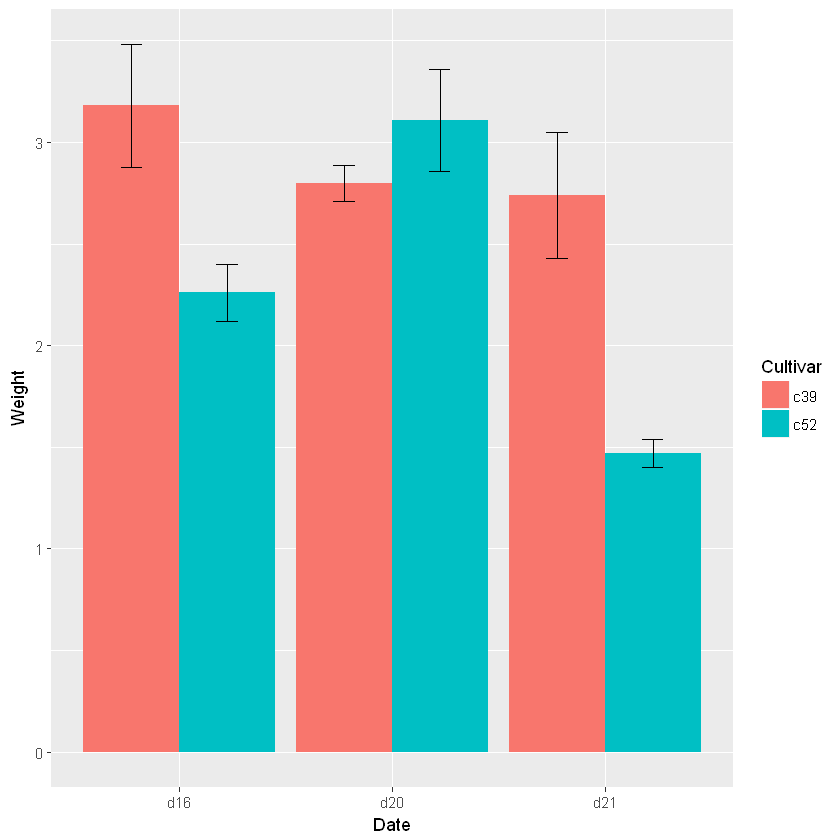

In [94]:
p<-ggplot(cabbage_exp,aes(Date,Weight,fill=Cultivar))
p+geom_bar(stat="identity",position="dodge")+geom_errorbar(aes(ymin=Weight-se,ymax=Weight+se),position=position_dodge(.9),width=.2)

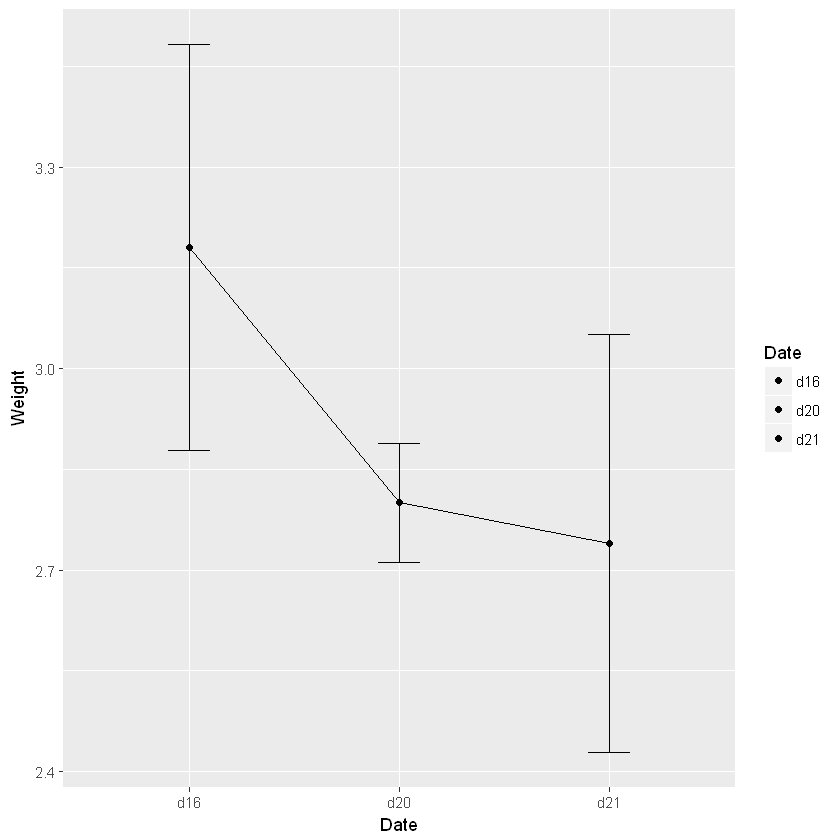

In [88]:
p+geom_line(aes(group=1))+geom_point()+geom_errorbar(aes(ymin=Weight-se,ymax=Weight+se),width=.2)

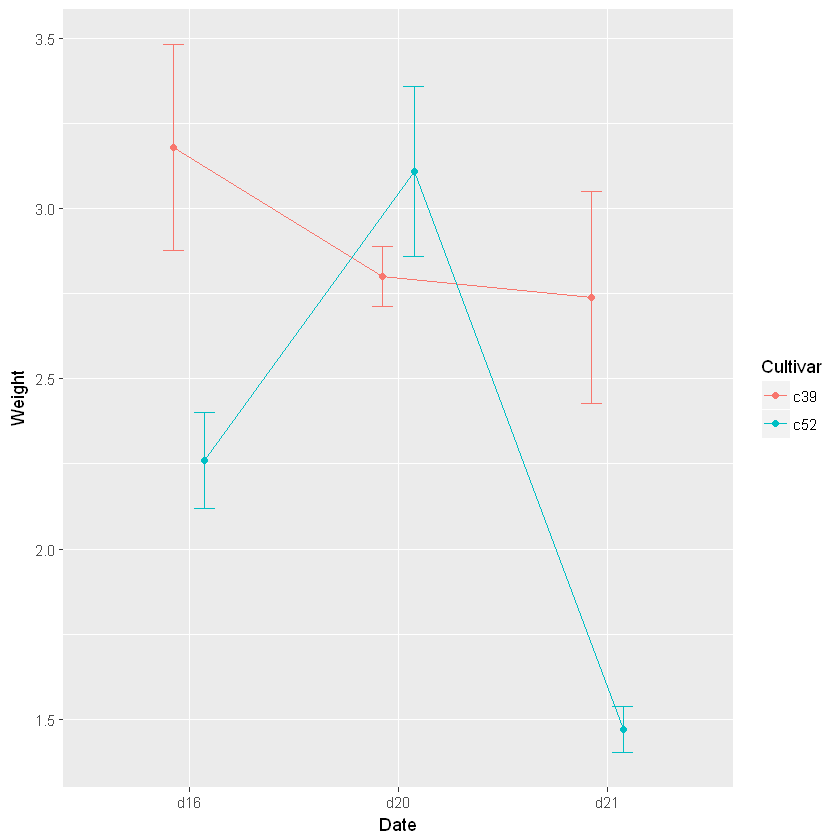

In [101]:
p<-ggplot(cabbage_exp,aes(Date,Weight,colour=Cultivar,group=Cultivar))
p+geom_line(position=position_dodge(.3))+geom_errorbar(aes(ymin=Weight-se,ymax=Weight+se),width=.2,position=position_dodge(.3))+geom_point(position=position_dodge(.3))

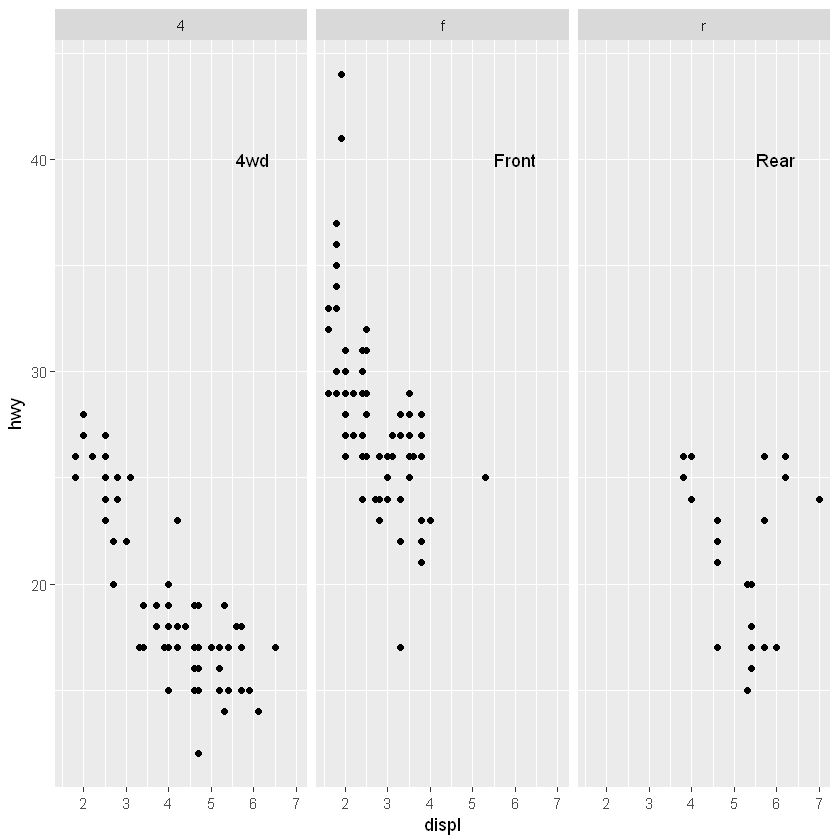

In [110]:
p<-ggplot(mpg,aes(x=displ,y=hwy))+geom_point()+facet_grid(.~drv)
f_labels<-data.frame(drv=c("4","f","r"),label=c("4wd","Front","Rear"))
p+geom_text(x=6,y=40,aes(label=label),data=f_labels)

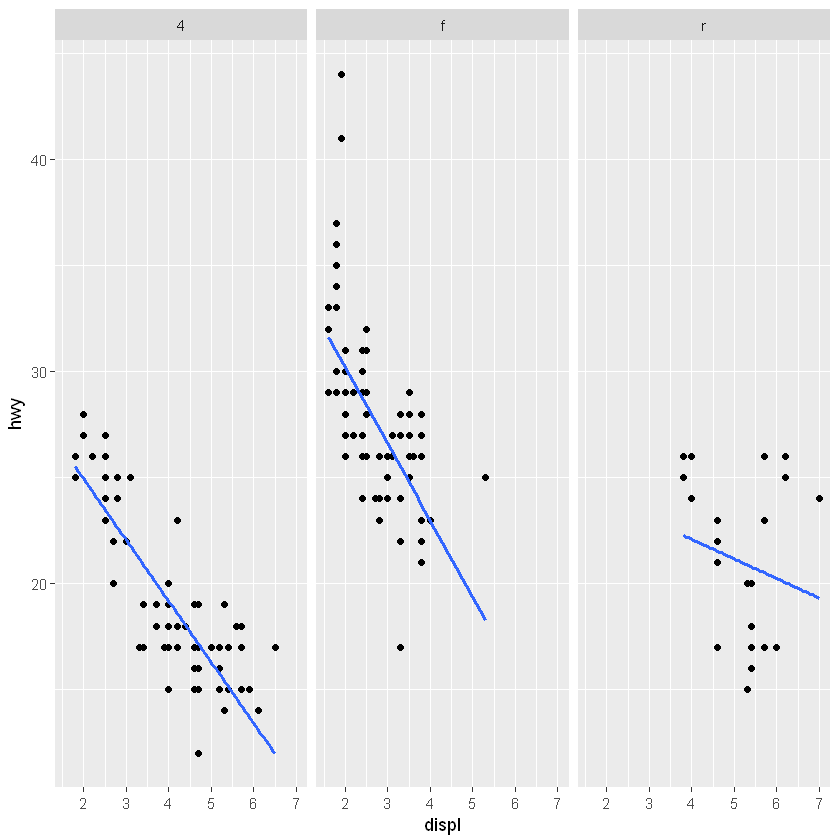

In [114]:
# add different equation
p<-ggplot(mpg,aes(x=displ,y=hwy))+geom_point()+facet_grid(.~drv)
p+geom_smooth(method=lm,se=FALSE)

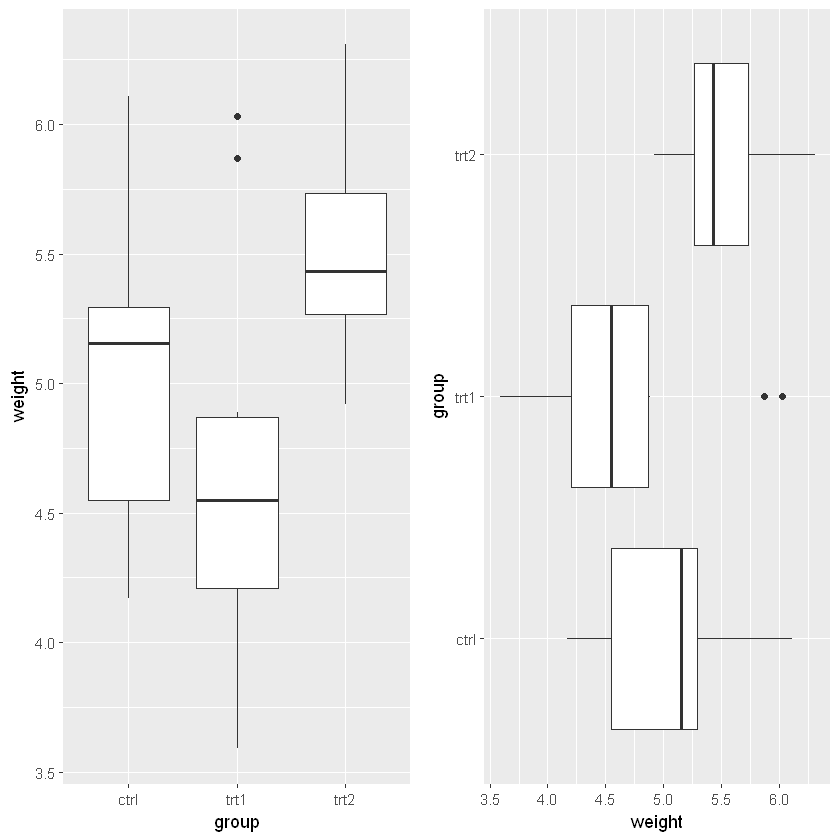

In [121]:
# Coo-ordinate flip
library(gridExtra)
p1<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_boxplot()
p2<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_boxplot()+coord_flip()
grid.arrange(p1,p2,nrow=1)

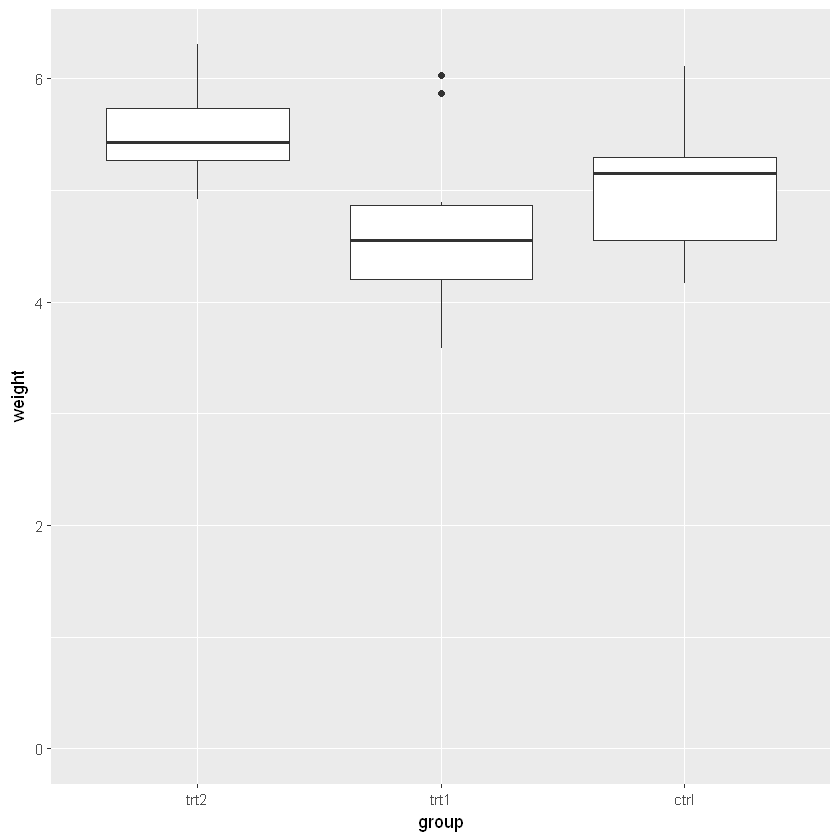

In [124]:
# reverse the axis label orders
p2+scale_x_discrete(limits=rev(levels(PlantGrowth$group)))

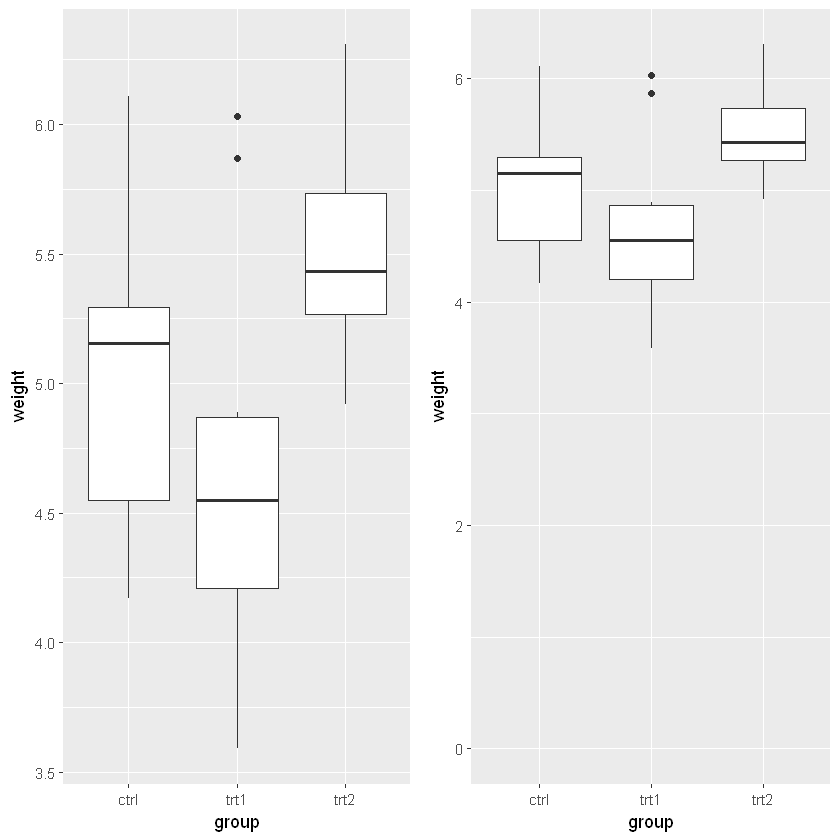

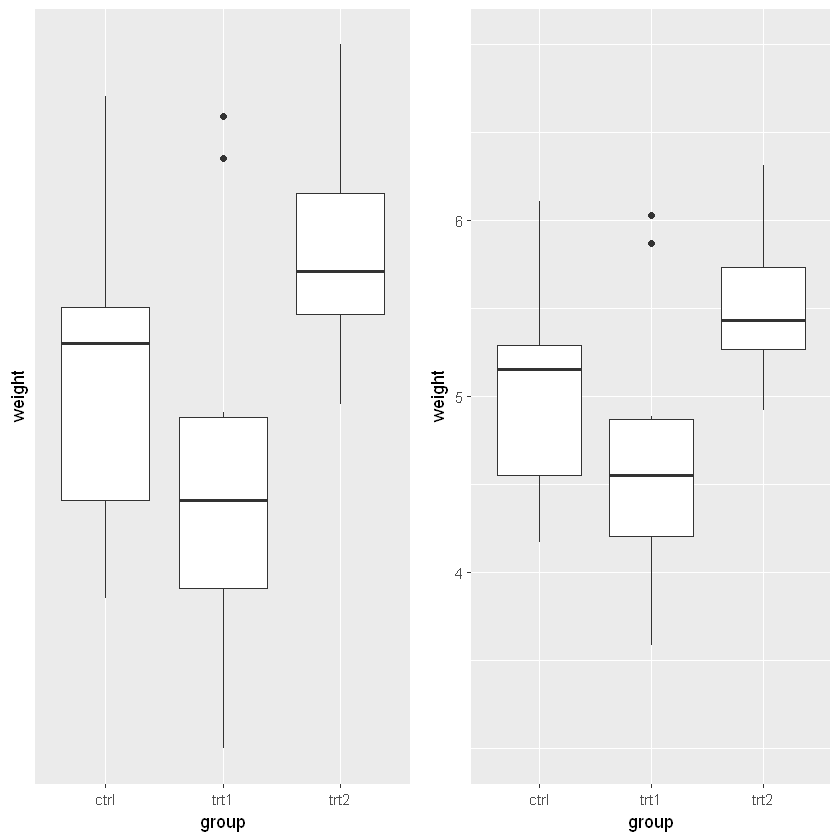

In [130]:
#put a limit on axis
p1<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_boxplot()
p2<-p1+ylim(0,max(PlantGrowth$weight))
grid.arrange(p1,p2,nrow=1)
p3<-p1+scale_y_continuous(breaks=NULL)
p4<-p1+scale_y_continuous(breaks=c(4,5,6),limits=c(3,7))
grid.arrange(p3,p4,nrow=1)

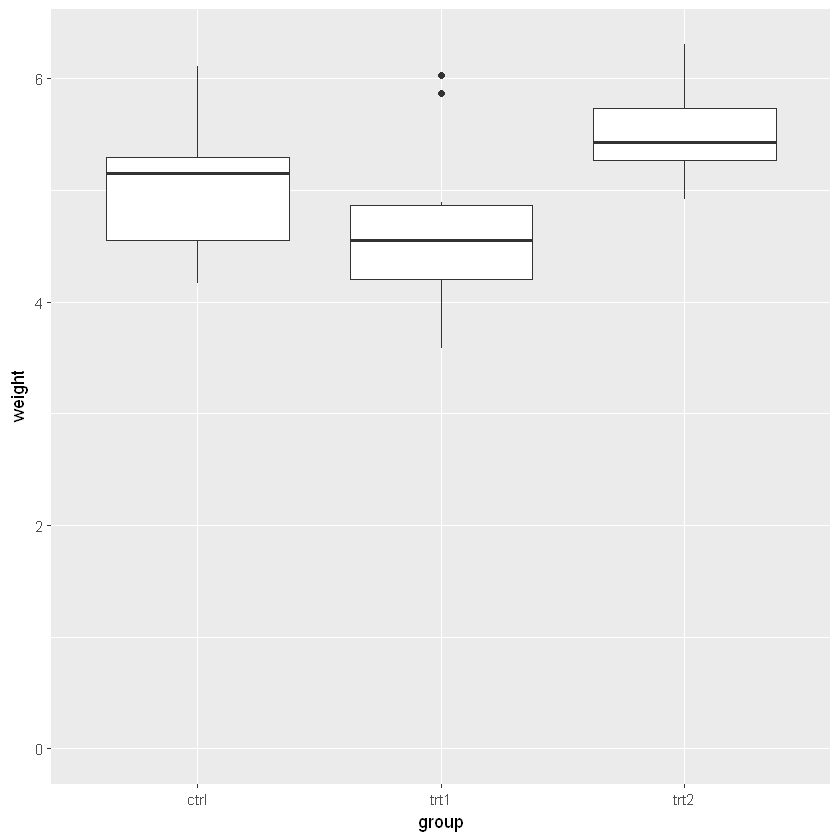

In [132]:
#expand limit to include zero
p1+expand_limits(y=0)

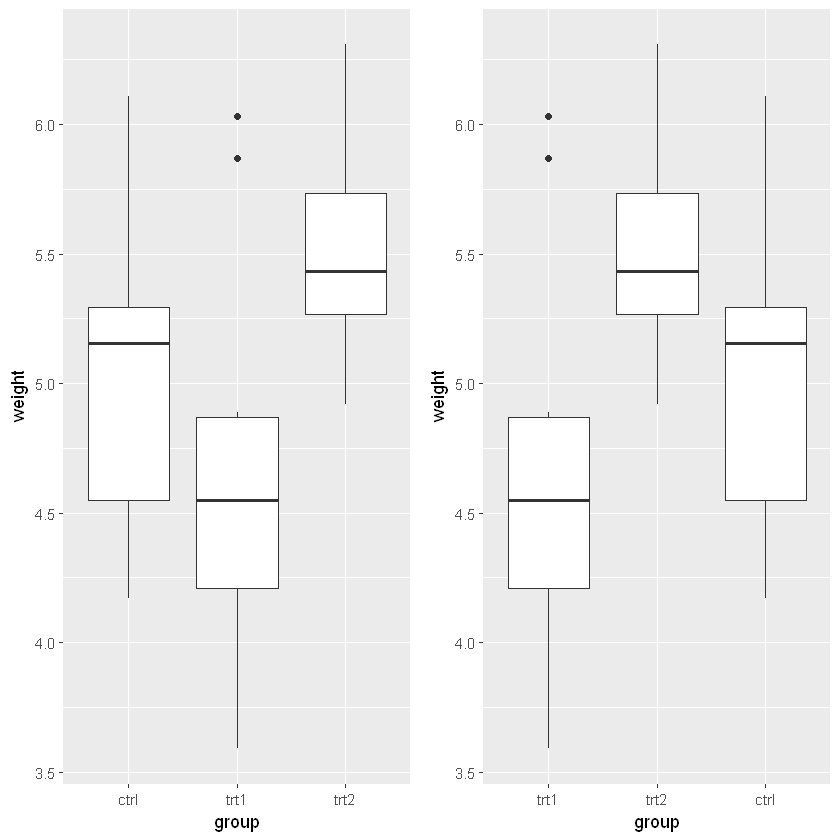

In [136]:
# Reverse a categorical axis
p<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_boxplot()
p1<-p+scale_x_discrete(limits=c("trt1","trt2","ctrl"))
grid.arrange(p,p1,nrow=1)

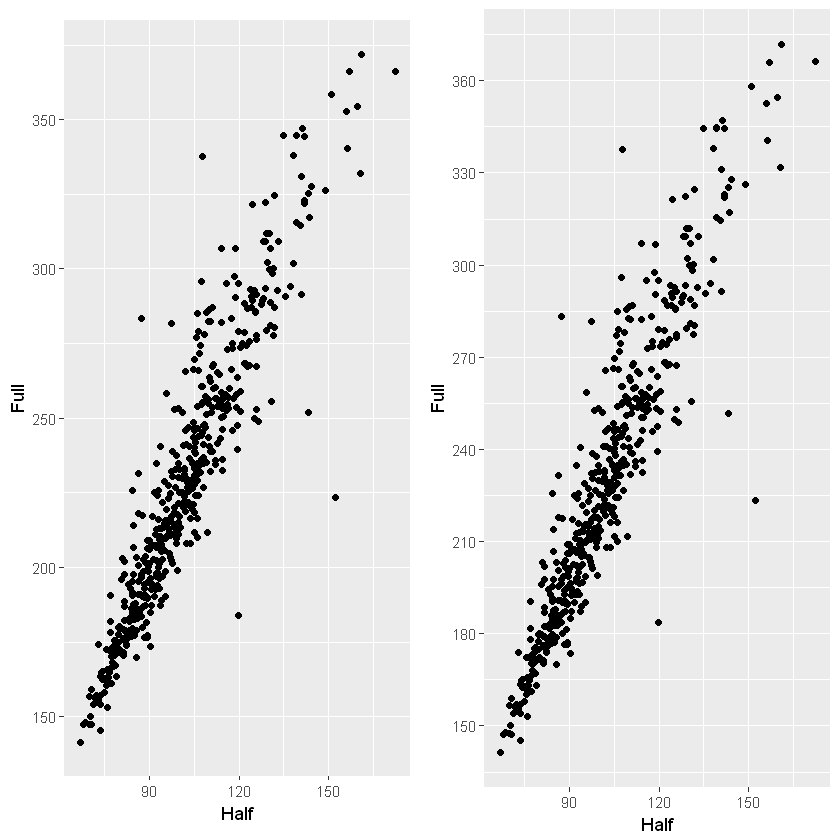

In [142]:
# setting the scaling ratio of x and y axis
library(gcookbook)
sp<-ggplot(marathon,aes(x=Half,y=Full))+geom_point()
sp1<-sp+coord_fixed()
sp2<-sp+scale_y_continuous(breaks=seq(0,420,30))+scale_x_continuous(breaks=seq(0,420,30))
grid.arrange(sp1,sp2,nrow=1)

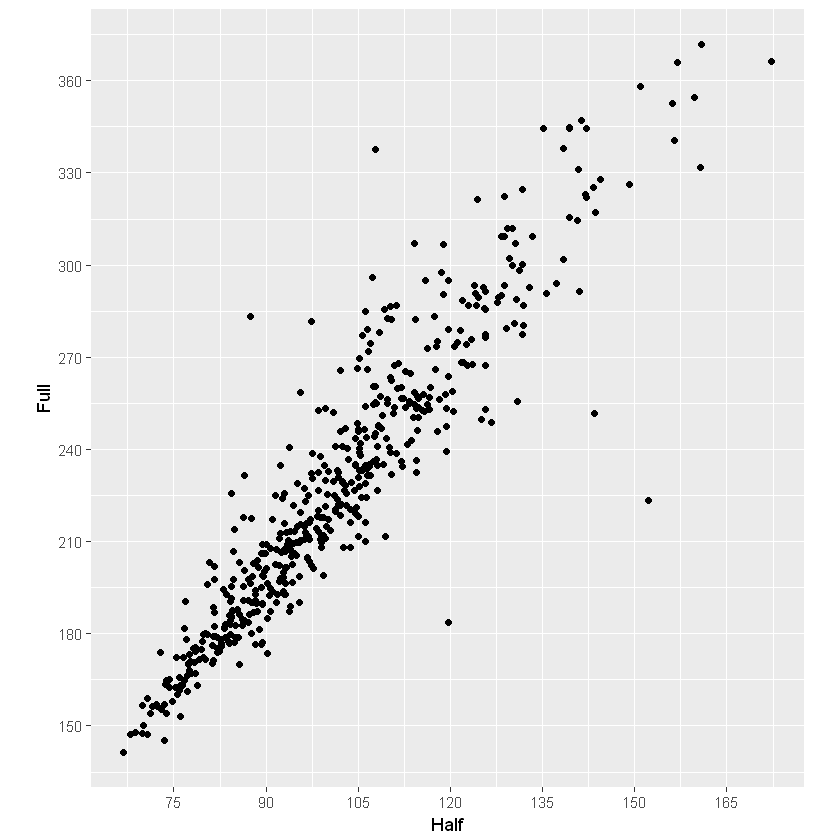

In [144]:
sp3<-sp+coord_fixed(ratio=1/2)+scale_y_continuous(breaks=seq(0,420,30))+scale_x_continuous(breaks=seq(0,420,15))
sp3

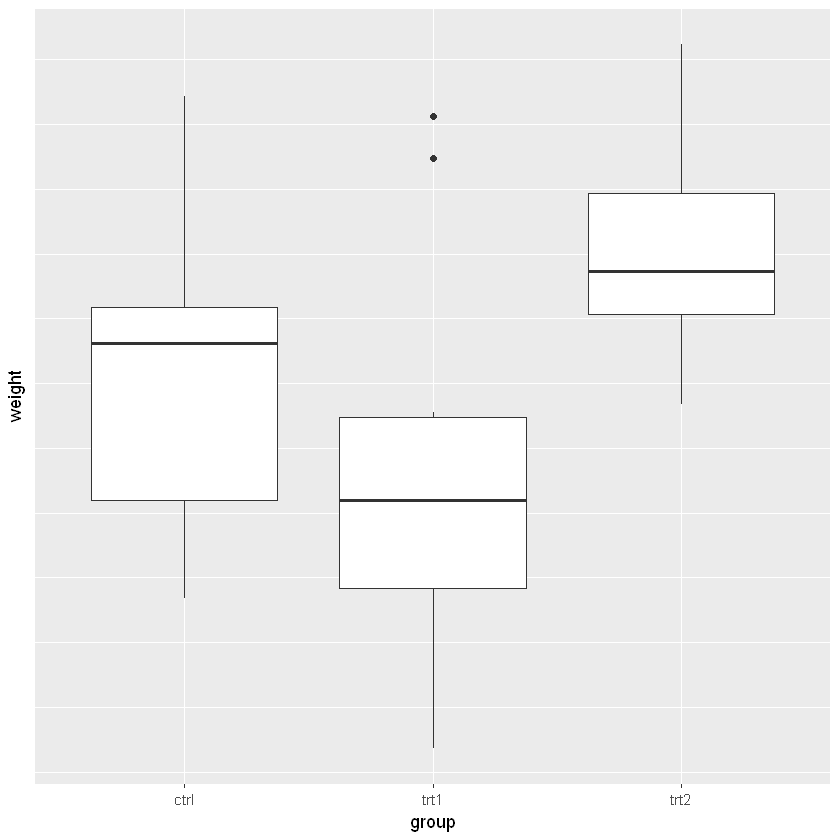

In [148]:
# Removing tick marks and labels
p<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_boxplot()
p+theme(axis.ticks.y=element_blank(),axis.text.y=element_blank())

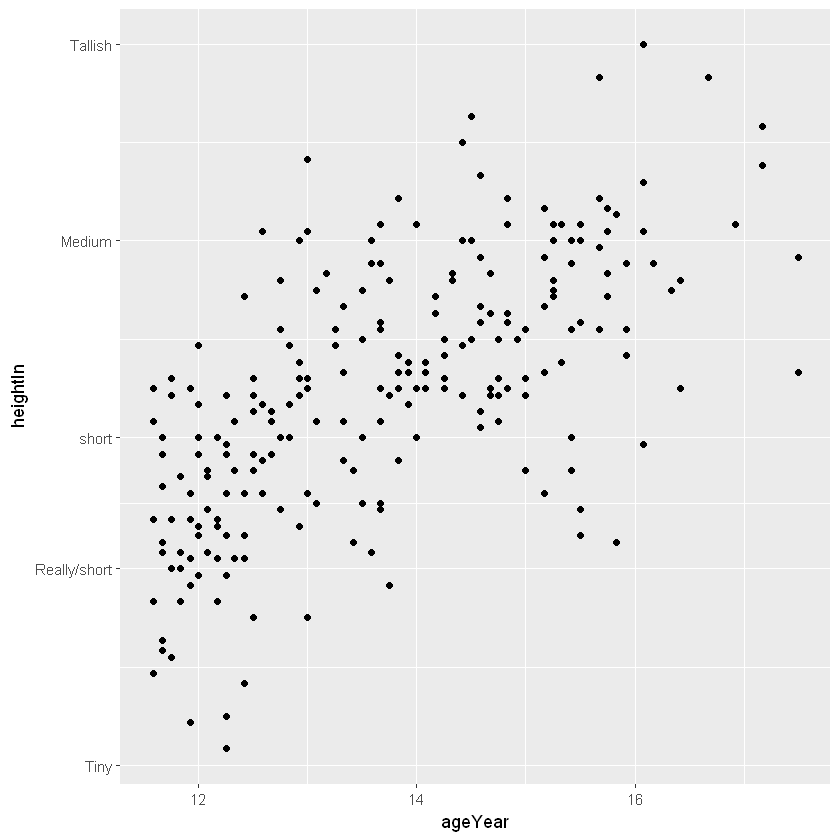

In [150]:
#changing text of labels
hwp<-ggplot(heightweight,aes(x=ageYear,y=heightIn))+geom_point()
hwp+scale_y_continuous(breaks=c(50,56,60,66,72),labels=c("Tiny","Really/short","short","Medium","Tallish"))

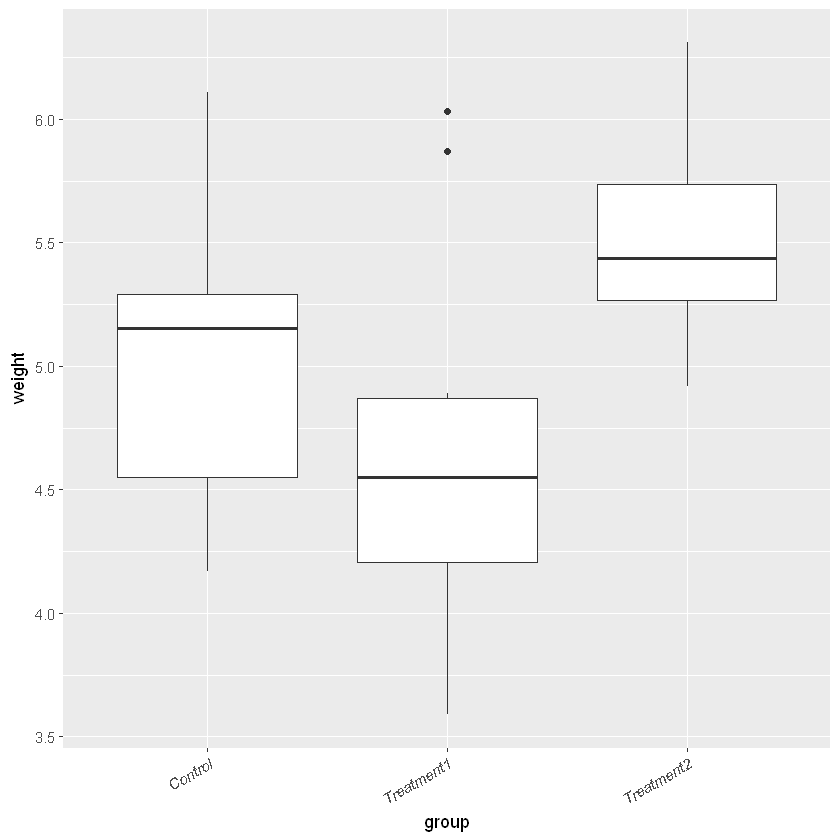

In [167]:
#changing appearance of text labels
bp<-ggplot(PlantGrowth,aes(x=group,y=weight))+geom_boxplot()
bp1<-bp+scale_x_discrete(breaks=c("ctrl","trt1","trt2"),labels=c("Control","Treatment1","Treatment2"))
bp1+theme(axis.text.x=element_text(angle=30,face="italic",vjust=1,hjust=1))

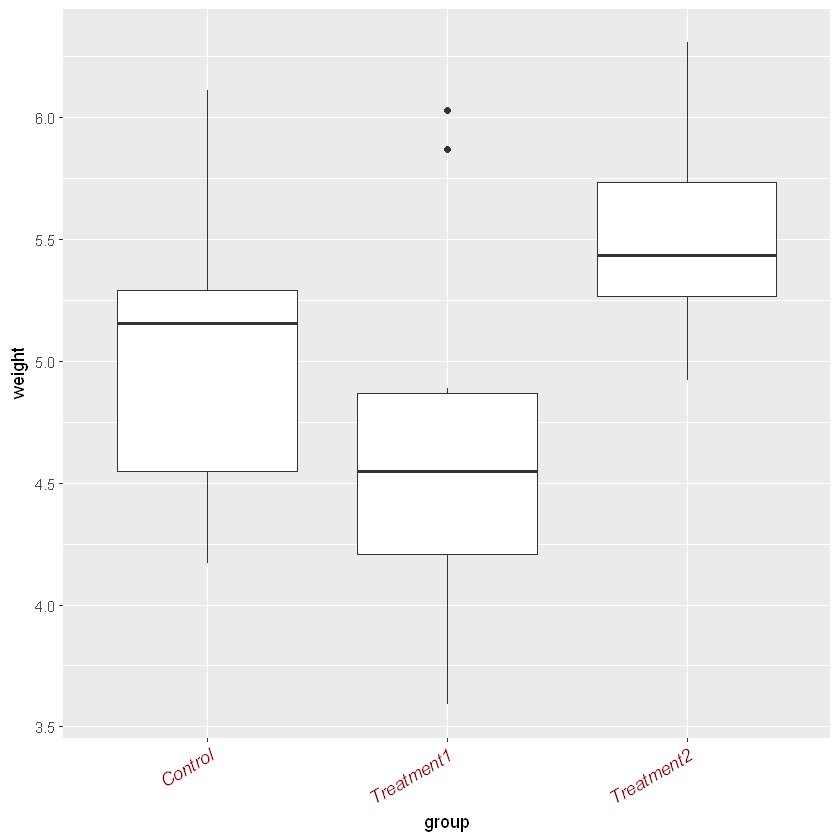

In [168]:
bp1+theme(axis.text.x=element_text(angle=30,colour="darkred",size=rel(1.2),face="italic",vjust=1,hjust=1))

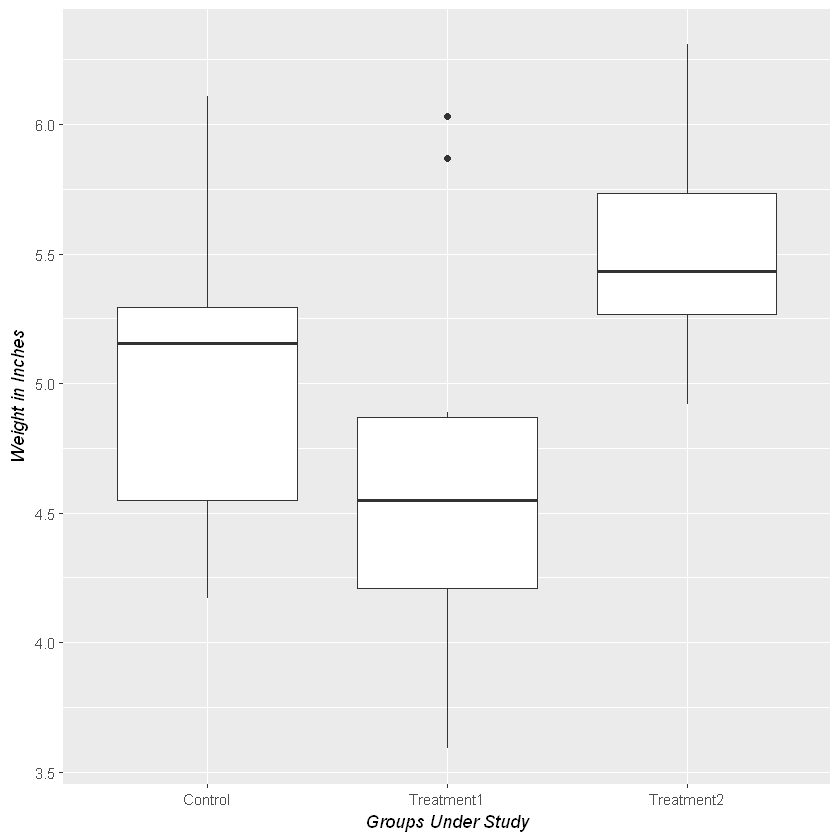

In [171]:
bp1+theme(axis.title.x=element_text(face="italic"),axis.title.y=element_text(face="italic"))+xlab("Groups Under Study")+ylab("Weight in Inches")

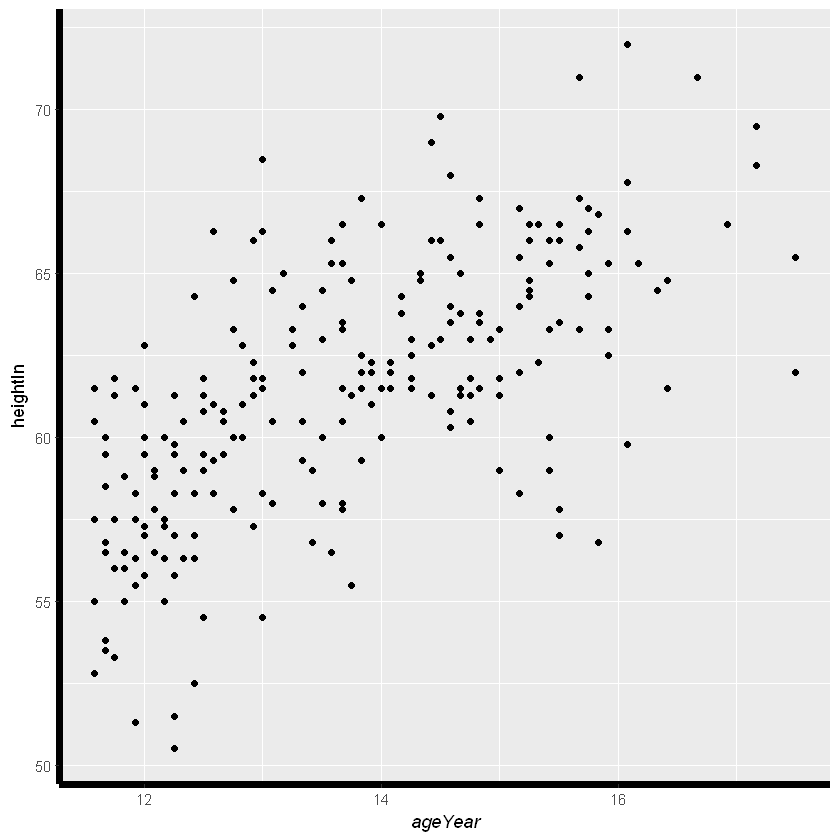

In [178]:
# showing lines in axis labels
p<-ggplot(heightweight,aes(x=ageYear,y=heightIn))+geom_point()
p+theme(axis.title.x=element_text(face="italic"),axis.line=element_line(colour="black",size=2))

,body,brain
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0
Guinea pig,1.04,5.5
Dipliodocus,11700.00,50.0


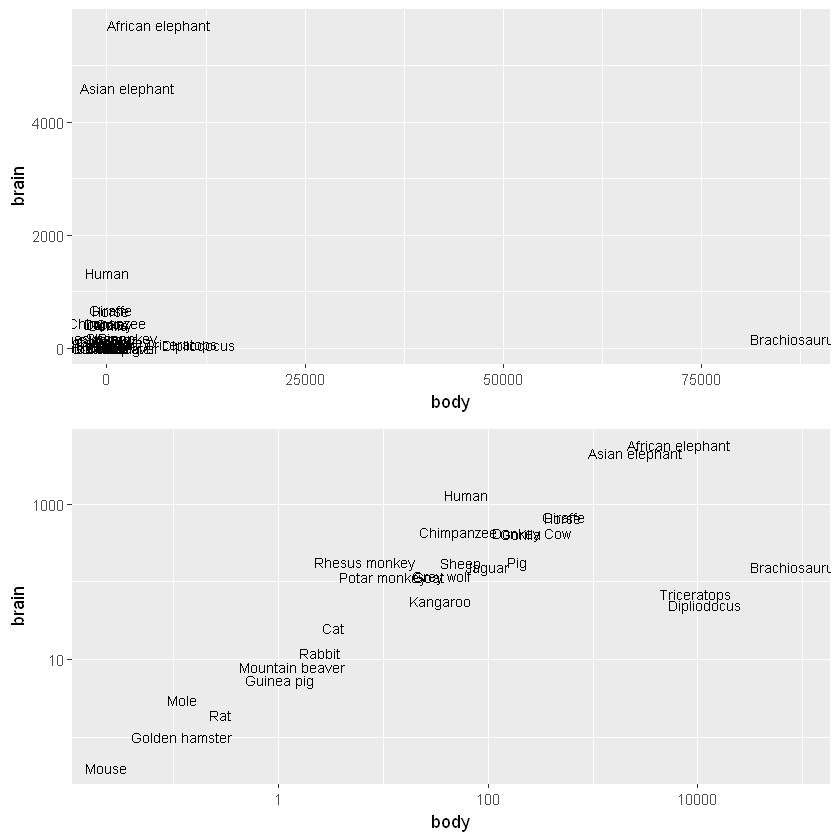

In [185]:
#using a logarithmic scale
library(MASS)
head(Animals)
p1<-ggplot(Animals,aes(x=body,y=brain,label=rownames(Animals)))+geom_text(size=3)
p2<-p+scale_x_log10()+scale_y_log10()
grid.arrange(p1,p2)

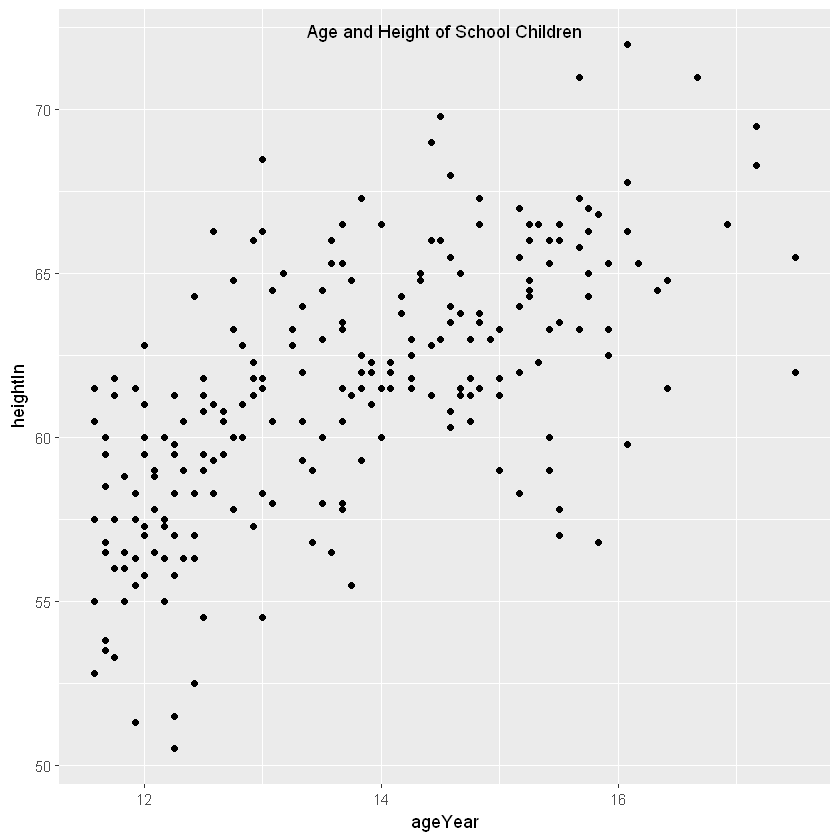

In [192]:
#put title inside the graph
p<-ggplot(heightweight,aes(x=ageYear,y=heightIn))+geom_point()
p+annotate("text",label="Age and Height of School Children",x=mean(range(heightweight$ageYear)),y=Inf,vjust=2)

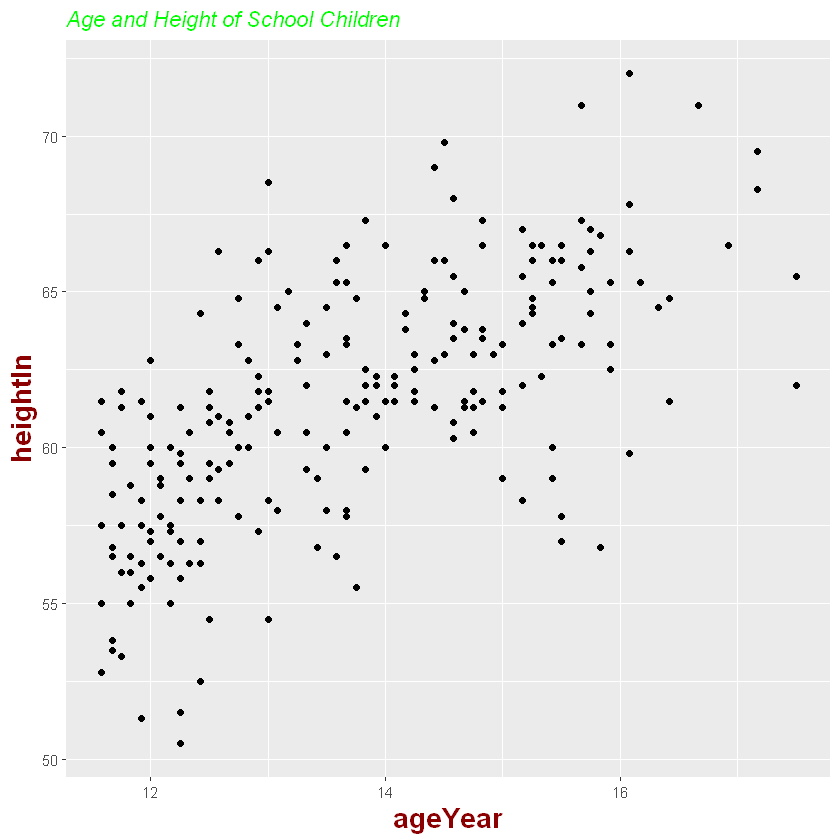

In [203]:
#changing appearance of text
p+ggtitle("Age and Height of School Children")+theme(plot.title=element_text(size=rel(1.2),face="italic",colour="green"),axis.title=element_text(face="bold",size=rel(1.5),colour="darkred"))

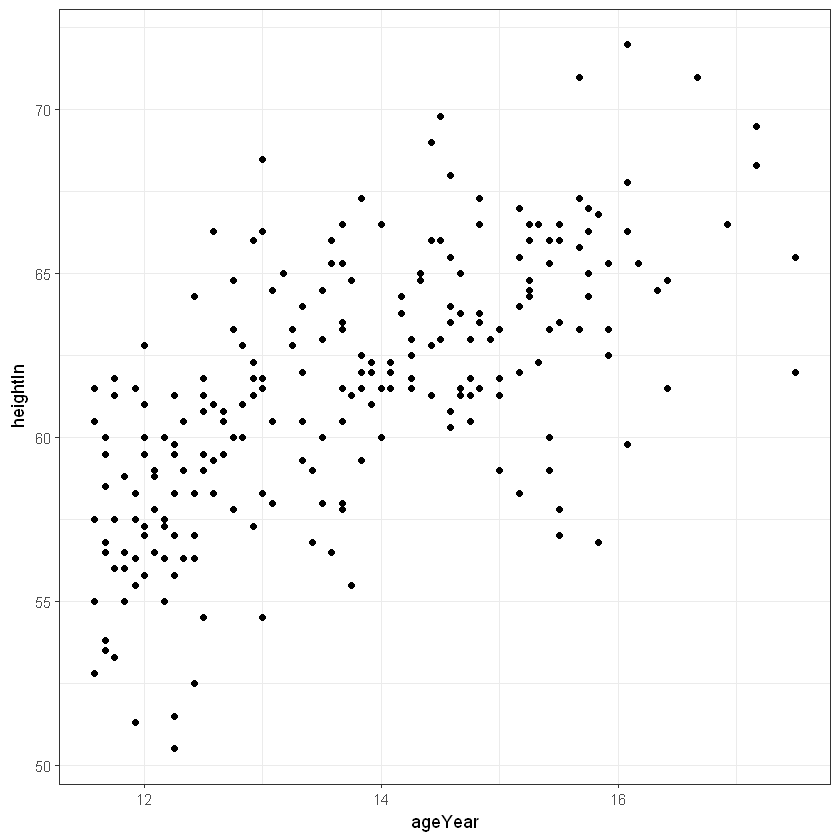

In [205]:
# changing appearance of theme elements
p<-ggplot(heightweight,aes(x=ageYear,y=heightIn))+geom_point()
p+theme_bw()

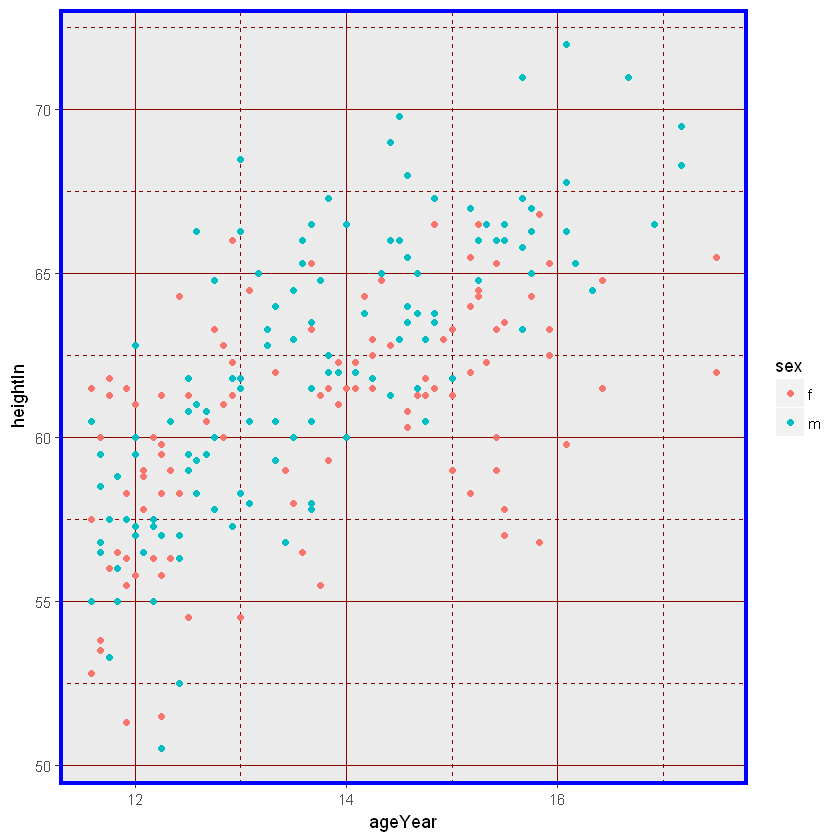

In [210]:
p<-ggplot(heightweight,aes(x=ageYear,y=heightIn,colour=sex))+geom_point()
p+theme(panel.grid.major=element_line(colour="darkred"),
        panel.grid.minor=element_line(colour="darkred",linetype="dashed"),
        panel.background=element_rect(colour="lightblue"),
        panel.border=element_rect(colour="blue",fill=NA,size=2))

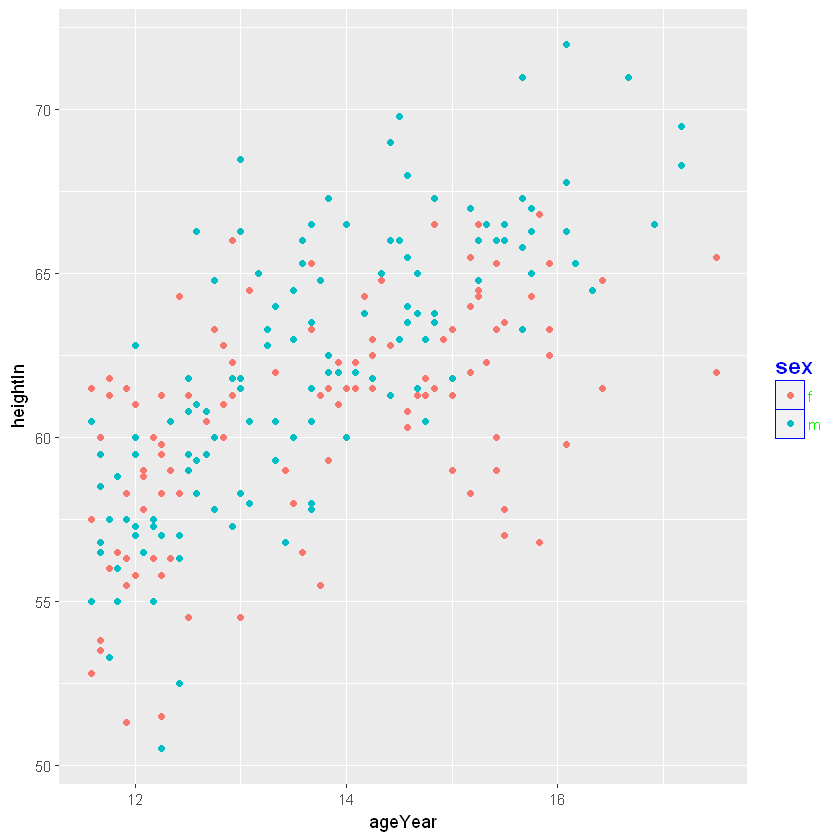

In [211]:
p+theme(legend.title=element_text(colour="blue",face="bold",size=14),
       legend.text=element_text(colour="green"),
       legend.key=element_rect(colour="blue",size=0.25))

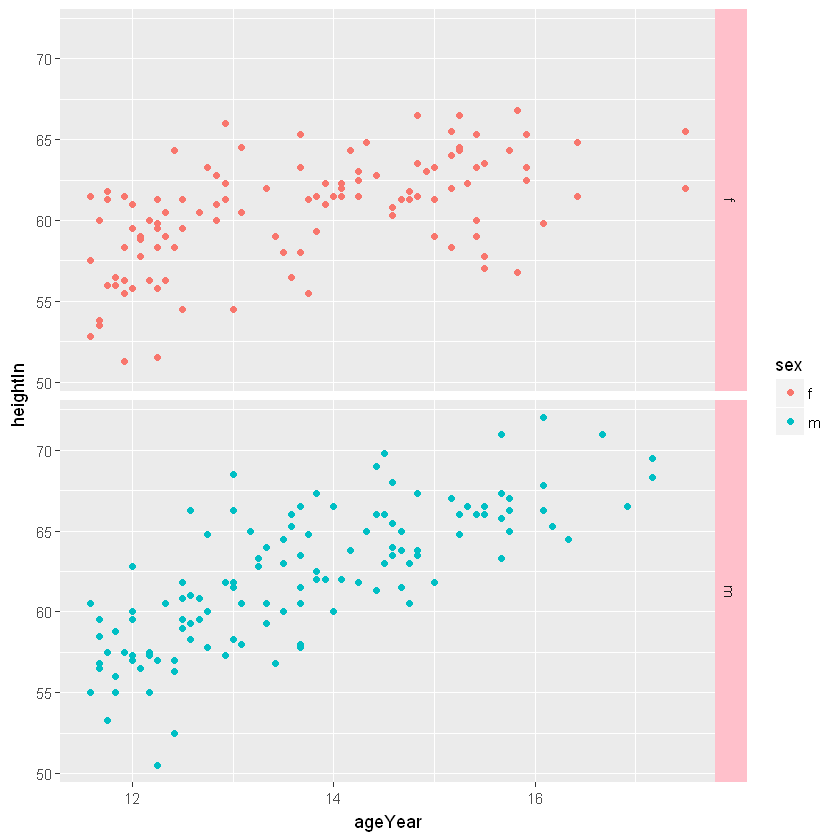

In [212]:
p+facet_grid(sex~.)+theme(strip.background=element_rect(fill="pink"))

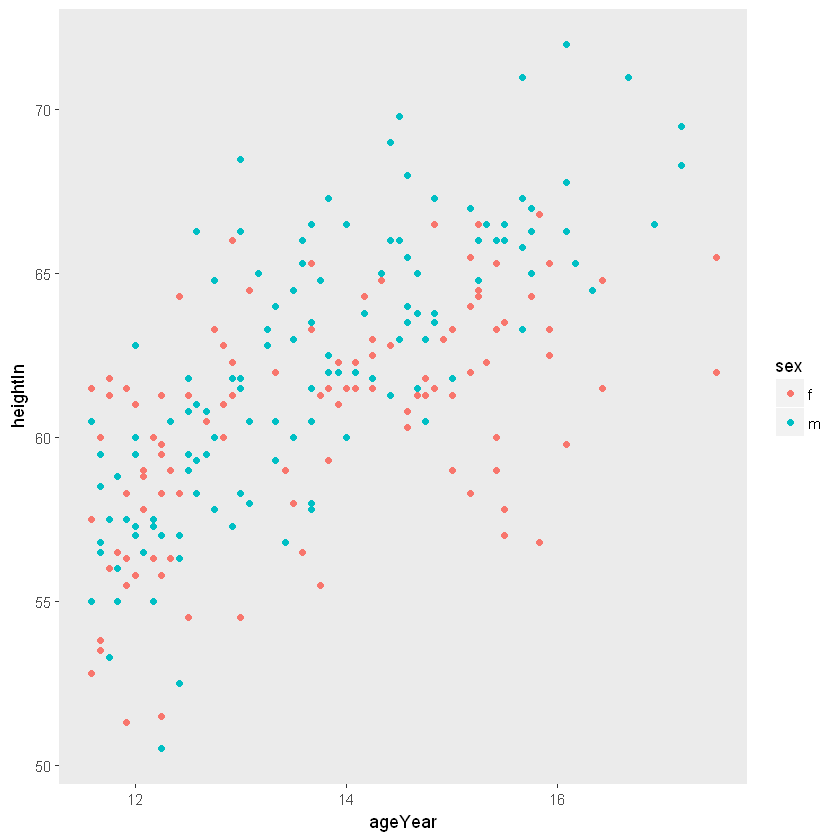

In [213]:
# hiding grid lines
p+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank())

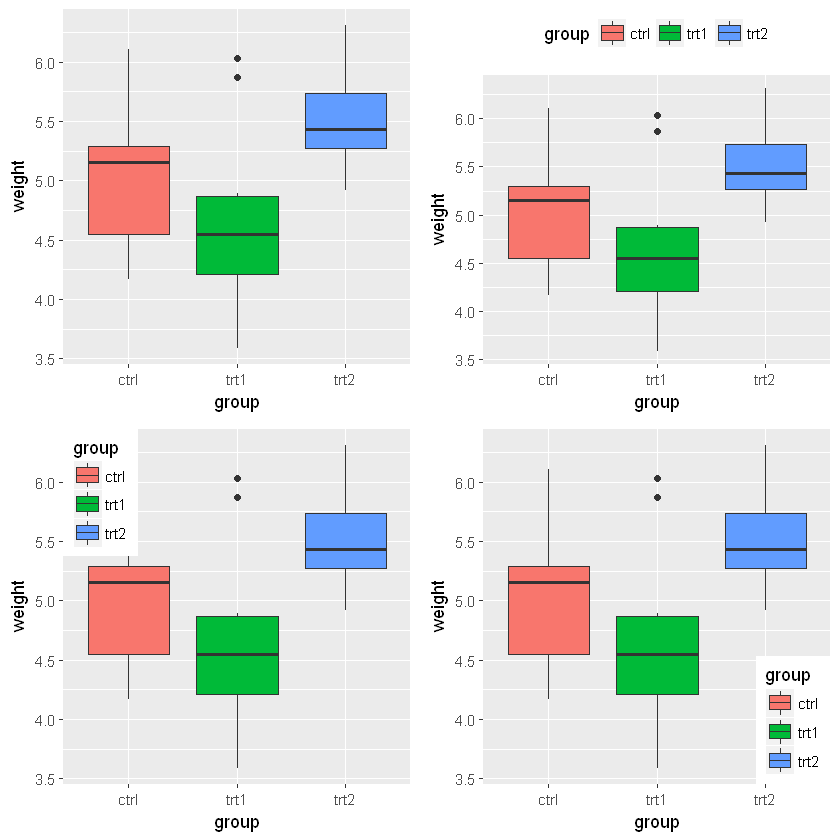

In [224]:
p<-ggplot(PlantGrowth,aes(x=group,y=weight,fill=group))+geom_boxplot()
p1<-p+guides(fill=FALSE)
p2<-p+theme(legend.position="top")
p3<-p+theme(legend.position=c(0,1),legend.justification=c(0,1))
p4<-p+theme(legend.position=c(1,0),legend.justification=c(1,0))
grid.arrange(p1,p2,p3,p4,nrow=2)

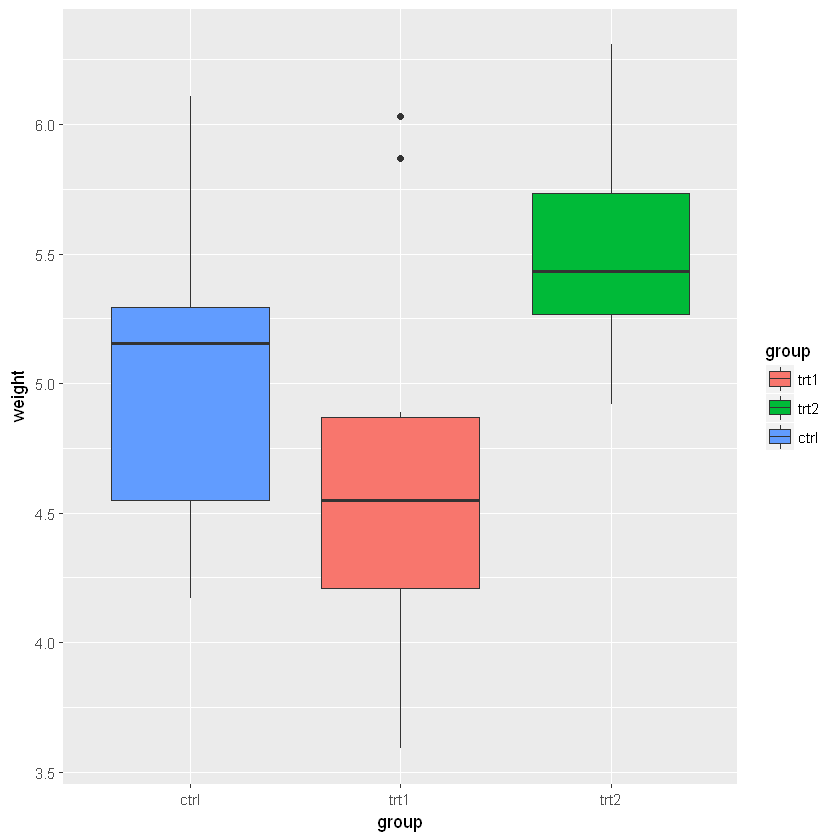

In [225]:
#changing order of legend
p+scale_fill_discrete(limits=c("trt1","trt2","ctrl"))

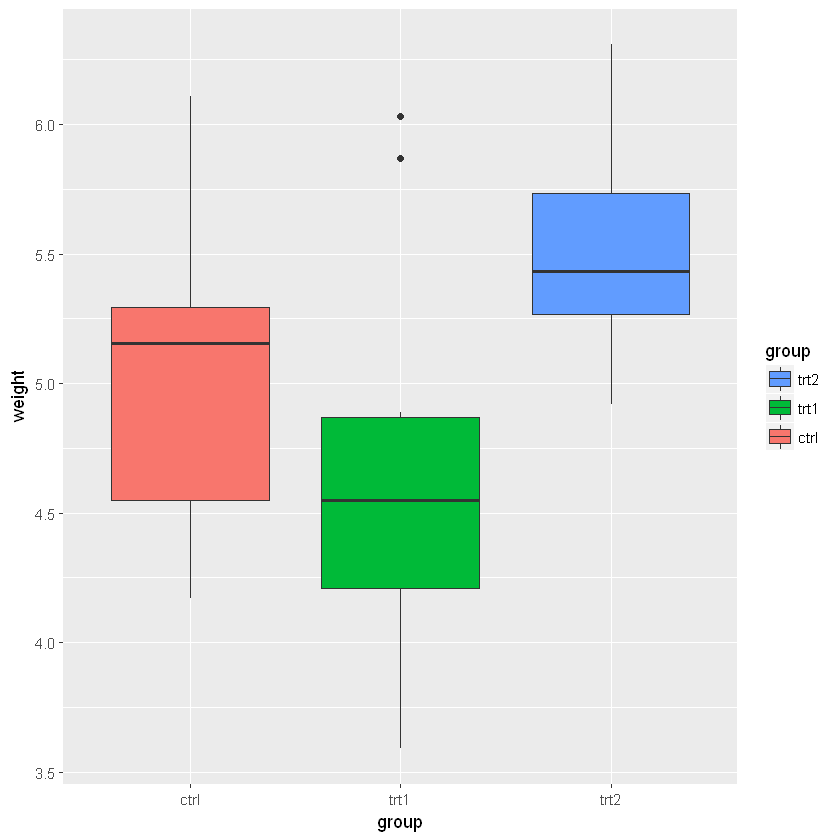

In [226]:
# reverse the legend order
p+guides(fill=guide_legend(reverse=TRUE))

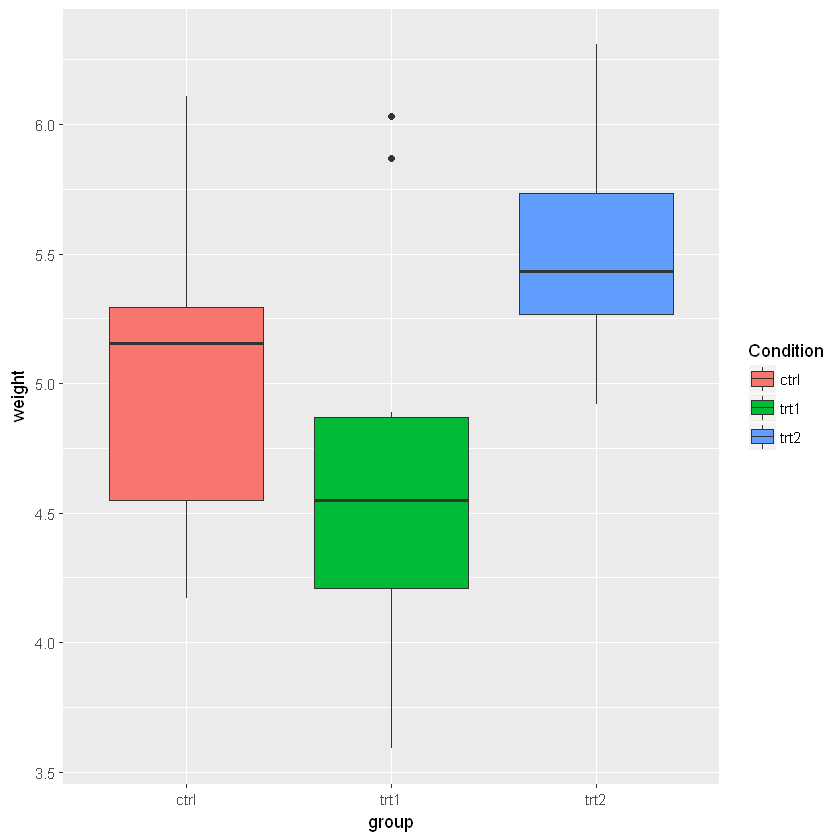

In [227]:
#changing the legend title
p+scale_fill_discrete(name="Condition")

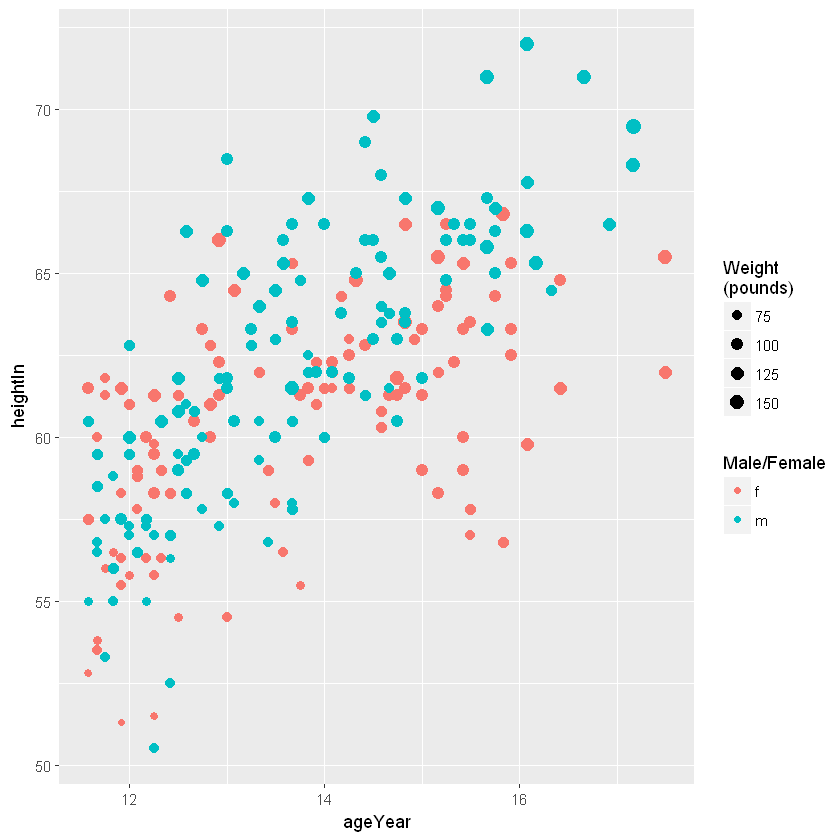

In [230]:
hw<-ggplot(heightweight,aes(x=ageYear,y=heightIn,colour=sex))+geom_point()+geom_point(aes(size=weightLb))+scale_size_continuous(range=c(1,4))
hw+labs(colour="Male/Female",size="Weight\n(pounds)")

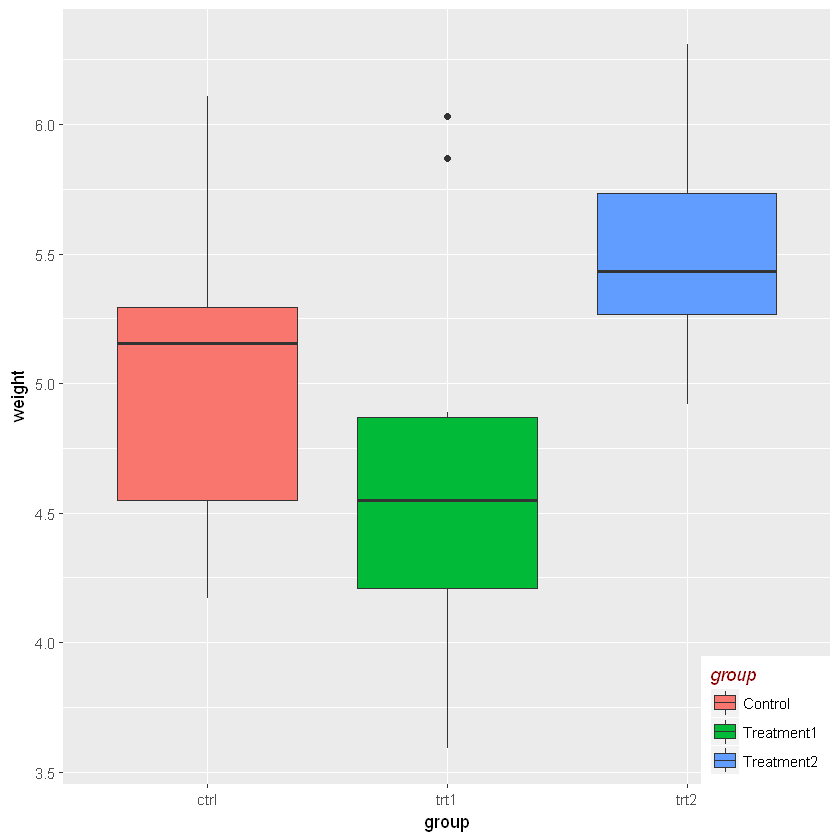

In [243]:
library(gcookbook)
p<-ggplot(PlantGrowth,aes(x=group,y=weight,fill=group))+geom_boxplot()
p1<-p+theme(legend.position=c(1,0),legend.justification=c(1,0),legend.title=element_text(face="italic",colour="darkred"))
p1+scale_fill_discrete(labels=c("Control","Treatment1","Treatment2"))